# Insurance Claims- Fraud Detection
## 1. Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

# 2. Import Library

In [562]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 3. Import Dataset

In [563]:
data=pd.read_csv("insurance.csv")

# 4. Basic Data Exploration

### 4.1 Data Shape

In [564]:
data.shape

(1000, 41)

**Observation**
- As we can see there are 1000 rows and 41 columns in dataset

### 4.2 Dataset columns data type

In [565]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

**Observation**
- As we can see there are 3 float type,17 integer type and 21 object types data columns present in dataset.

### 4.3 Statistical Summary

In [566]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,NaN,NaN,NaN,203.954,115.113174,0.0,115.75,199.5,276.25,479.0
age,1000.0,NaN,NaN,NaN,38.948,9.140287,19.0,32.0,38.0,44.0,64.0
policy_number,1000.0,NaN,NaN,NaN,546238.648,257063.005276,100804.0,335980.25,533135.0,759099.75,999435.0
policy_bind_date,1000,951,01-01-2006,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_state,1000,3,OH,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_csl,1000,3,250/500,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_deductable,1000.0,NaN,NaN,NaN,1136.0,611.864673,500.0,500.0,1000.0,2000.0,2000.0
policy_annual_premium,1000.0,NaN,NaN,NaN,1256.40615,244.167395,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,NaN,NaN,NaN,1101000.0,2297406.598118,-1000000.0,0.0,0.0,0.0,10000000.0
insured_zip,1000.0,NaN,NaN,NaN,501214.488,71701.610941,430104.0,448404.5,466445.5,603251.0,620962.0


**Observation**
- Column _c39 and Unnamed:40 is meaningless which are not use for our analysis so we will drop the columns.
- As we can see there is no null value in our dataset,except _c39 and unnamed:40 columns which we will drop it.
- There are some columns where mean value and 50% value having difference, we will visualize this in our study.
- There are some character (?) in Police_report_availabe and Property_Damage columns, we need to reactify this.
- We can see there are some columns like months as cusotmer,capital gain,incident_hour_of_the_day,body injuries,witness,injury claim and property claim having 0 value in coloums.
- policy bind data and incident date will not affect the fraud dedection since policy expiration data also not availabe so we will drop these two columns.
- policy number also is just for identification purpose so we will drop this.
- umberella limit can't be -1000000 so we we need to change to positive.

### 4.4 Dropping Unwanted columns

In [567]:
data.drop(["_c39","Unnamed: 40","policy_bind_date","incident_date","policy_number"],axis=1,inplace=True)

### 4.5 Checking Null Value

In [568]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

**Observation**
- As we have cofirmed that no null value presence in data set.

### 4.6 Checking duplicate rows in dataset

In [569]:
s=data.duplicated()
s.sum()

0

## 4.7 Checking unique data level for each columns

In [570]:
data.nunique()

months_as_customer              391
age                              46
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   3
bodily_injuries                   3
witnesses                         4
police_report_available     

# 5.Seperating Numerical and Categorical value

In [571]:
numeric_feat=[]
categorical_feat=[]
num=["int64","float64"]
cat=["O"]
for column in data.columns:
    if data[column].dtypes in num:
        numeric_feat.append(column)
    if data[column].dtypes in cat:
        categorical_feat.append(column)

In [572]:
numeric_feat

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [573]:
categorical_feat


['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [574]:
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# 6. Dealing with special character in dataset

In [575]:
data["police_report_available"].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

**As we can see there are 343 rows which having "?" in polic_report_availabe columns. we cant remove so many rows so for preventing data lost we will fill with NA mean Report not avaialble.

In [576]:
data["police_report_available"].replace("?","NA",inplace=True)

In [577]:
data["police_report_available"].value_counts()

NO     343
NA     343
YES    314
Name: police_report_available, dtype: int64

**As we can see data has been replace with NA.**

In [578]:
data["property_damage"].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [579]:
data["property_damage"].replace("?","NA",inplace=True)

In [580]:
data["property_damage"].value_counts()

NA     360
NO     338
YES    302
Name: property_damage, dtype: int64

**Have also replaced property damage columns value with NA for "?".**

In [581]:
data["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [582]:
data["collision_type"].replace("?","NA",inplace=True)

In [583]:
data["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
NA                 178
Name: collision_type, dtype: int64

# 7. Dealing with zero value in dataset

In [584]:
data[data["months_as_customer"]==0]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
497,0,32,OH,500/1000,1000,1377.04,0,441363,MALE,College,...,1,NO,39720,6620,6620,26480,Accura,MDX,2002,N


**As we can see months as customer columns having one row with zero value so we will drop this columns.**

In [585]:
data.drop(data.loc[data["months_as_customer"]==0].index,inplace=True)

In [586]:
data[data["months_as_customer"]==0]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported


In [587]:
data

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,NA,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,1,NA,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,3,NA,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [588]:
data.reset_index(inplace = True,drop=True)

**We can see row has been deleted.**

In [589]:
data["incident_hour_of_the_day"].value_counts()

17    54
3     53
0     52
23    51
16    49
4     46
13    46
10    46
9     43
14    43
6     43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

**As by seeing the table we can infer that these are timing of incident happen at 23 we can see there are 51 incident, so in midnight usally incident increase hence we can say that 0 refers to 24 hr time,will be replac with 24.**

In [590]:
data["incident_hour_of_the_day"].replace(0,24,inplace=True)

In [591]:
data[data["incident_hour_of_the_day"]==0]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported


**we can see row has been replace with 24.**

In [592]:
data["incident_hour_of_the_day"].value_counts()

17    54
3     53
24    52
23    51
16    49
10    46
13    46
4     46
6     43
14    43
9     43
21    42
18    41
19    40
7     40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

In [593]:
data["capital-gains"].value_counts()

0        508
46300      5
68500      4
51500      4
45500      3
        ... 
54700      1
40100      1
33200      1
37300      1
72700      1
Name: capital-gains, Length: 338, dtype: int64

In [594]:
data["injury_claim"].value_counts()

0        25
640       7
480       7
1180      5
860       5
         ..
10800     1
12580     1
6700      1
4650      1
16500     1
Name: injury_claim, Length: 638, dtype: int64

In [595]:
data["bodily_injuries"].value_counts()

0    340
2    332
1    327
Name: bodily_injuries, dtype: int64

In [596]:
data["witnesses"].value_counts()

1    257
2    250
0    249
3    243
Name: witnesses, dtype: int64

In [597]:
data["property_claim"].value_counts()

0        19
860       6
640       5
480       5
10000     5
         ..
5350      1
6700      1
20550     1
4650      1
11260     1
Name: property_claim, Length: 626, dtype: int64

In [598]:
data["property_damage"].value_counts()

NA     359
NO     338
YES    302
Name: property_damage, dtype: int64

**Capital gains,bodily injuries,injury claim,property claim and witness column zero value make sense so will not removed these zero value from these columns.**

In [599]:
data[data["umbrella_limit"]<0]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
290,284,42,OH,100/300,500,1338.54,-1000000,438178,MALE,Associate,...,1,NA,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


**As we can see umbrella limit is negative number which is not possible so we will make it positive.**

In [600]:
data["umbrella_limit"].replace(-1000000,1000000,inplace=True)

# 6. Exploratory Data Analysis

## 6.1 Univariate Analysis

### Months as customer

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

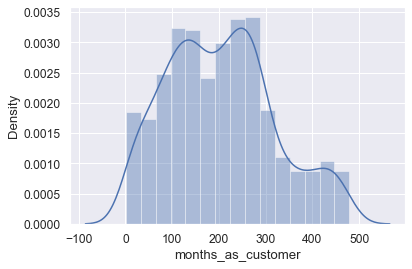

In [601]:
sns.distplot(data["months_as_customer"])

**Observation**
- we can see the months as customer data looks uniform.

### Age

<AxesSubplot:xlabel='age', ylabel='Density'>

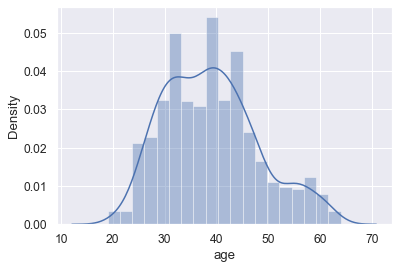

In [602]:

sns.distplot(data["age"])

**Observation**
- we can see the age data looks uniform.

### Policy state

In [603]:
data["policy_state"].value_counts()

OH    351
IL    338
IN    310
Name: policy_state, dtype: int64

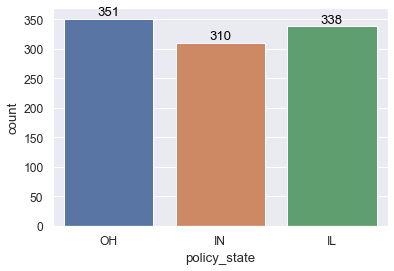

In [604]:
s=sns.countplot(data["policy_state"])
for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

### policy Csl (Combined single limit)

In [605]:
data["policy_csl"].value_counts()

250/500     351
100/300     349
500/1000    299
Name: policy_csl, dtype: int64

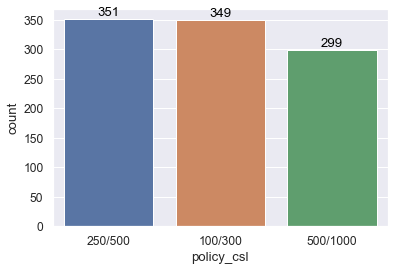

In [606]:
s=sns.countplot(data["policy_csl"])
for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

### Policy Deductable

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

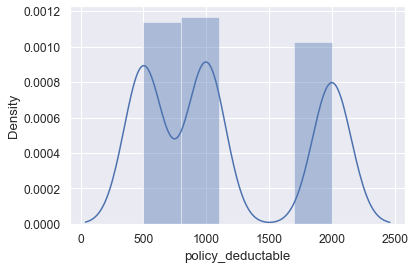

In [607]:
sns.distplot(data["policy_deductable"])

**Observation**
- Data seems to be unifrom and look like normal distribution.

### Policy annual premium

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

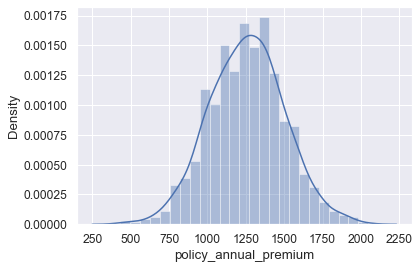

In [608]:
sns.distplot(data["policy_annual_premium"])

**Observation**
- Data is normally distributed.

### Umbrella limit

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

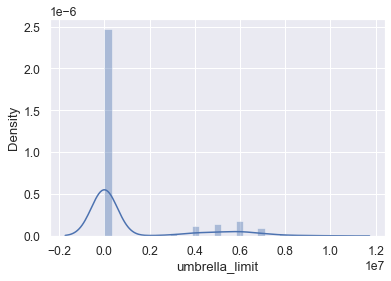

In [609]:
sns.distplot(data["umbrella_limit"])

**We can see data is skeewed right side.**

### Insured zip

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

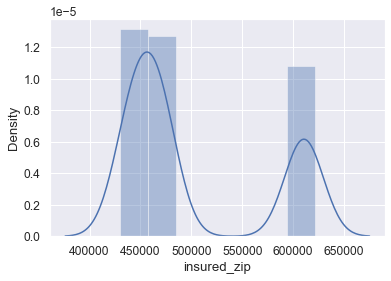

In [610]:
sns.distplot(data["insured_zip"])

**Observation**
- Insured zip columns data look like normally distributed.

### Insured Sex

In [611]:
data["insured_sex"].value_counts()

FEMALE    537
MALE      462
Name: insured_sex, dtype: int64

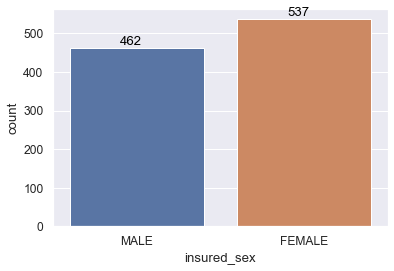

In [612]:
s=sns.countplot(data["insured_sex"])
for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

**As we can see female having more number of insured than male.**

### Insured Education level

In [613]:
data["insured_education_level"].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        121
Name: insured_education_level, dtype: int64

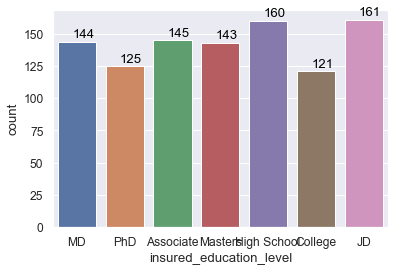

In [614]:
s=sns.countplot(data["insured_education_level"])
for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

### Insured Occupation

In [615]:
data["insured_occupation"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         77
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

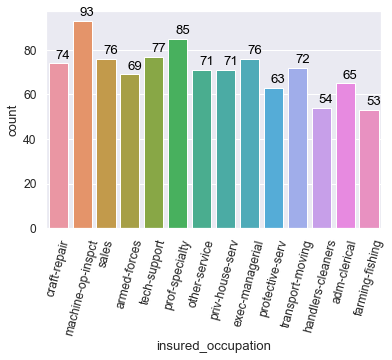

In [616]:
s=sns.countplot(data["insured_occupation"])
s.set_xticklabels(s.get_xticklabels(),rotation=75);

for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

### Insured hobbies

In [617]:
data["insured_hobbies"].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
golf              55
movies            55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      48
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

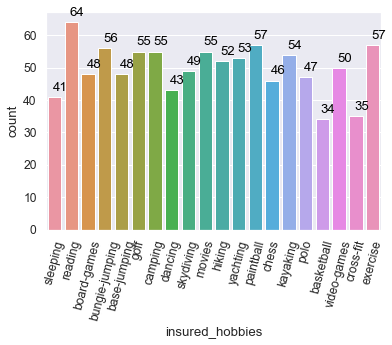

In [618]:
s=sns.countplot(data["insured_hobbies"])
s.set_xticklabels(s.get_xticklabels(),rotation=75);

for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

### Insured relationship

In [619]:
data["insured_relationship"].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              154
unmarried         141
Name: insured_relationship, dtype: int64

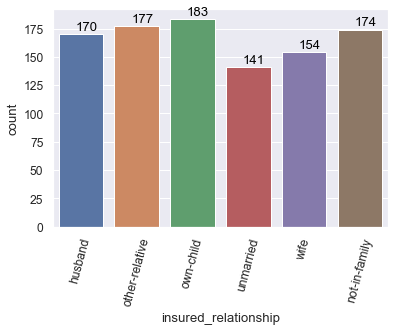

In [620]:
s=sns.countplot(data["insured_relationship"])
s.set_xticklabels(s.get_xticklabels(),rotation=75);

for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

### Capital Gain

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

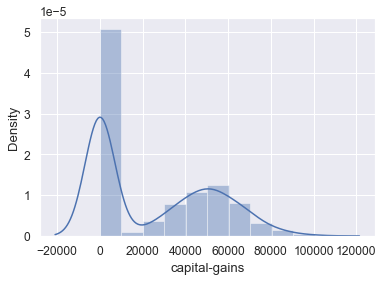

In [621]:
sns.distplot(data["capital-gains"])

**As we can see data looks normal distribution but we have seen that 0  value in capitals gains due to which plot looks little different.**

### Capital loss

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

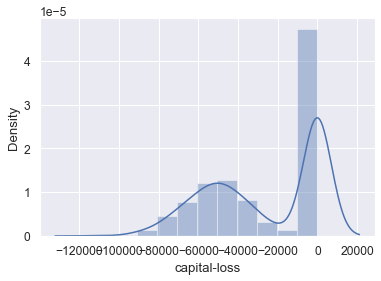

In [622]:
sns.distplot(data["capital-loss"])

**This also looks like same pattern compare to capital gain columns.**

### Incident Type

In [623]:
data["incident_type"].value_counts()

Multi-vehicle Collision     418
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

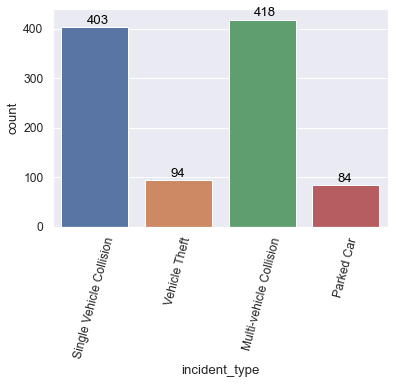

In [624]:
s=sns.countplot(data["incident_type"])
s.set_xticklabels(s.get_xticklabels(),rotation=75);

for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

**Observation**
- We can see that multi vechile collision and single vechile collision incident occured more.

### Collision Type

In [625]:
data["collision_type"].value_counts()

Rear Collision     291
Side Collision     276
Front Collision    254
NA                 178
Name: collision_type, dtype: int64

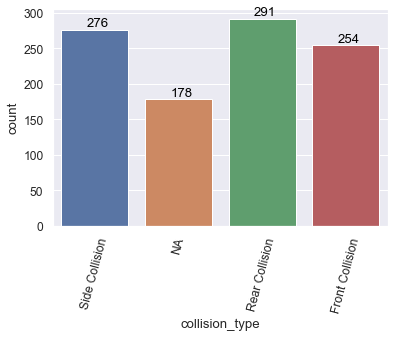

In [626]:
s=sns.countplot(data["collision_type"])
s.set_xticklabels(s.get_xticklabels(),rotation=75);

for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

### Incident Severity`

In [627]:
data["incident_severity"].value_counts()

Minor Damage      353
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

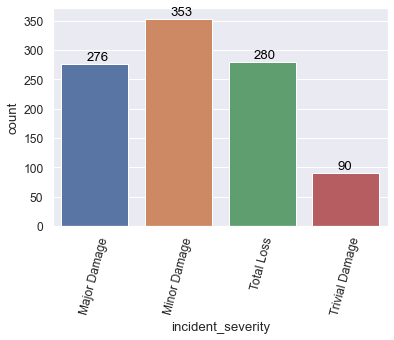

In [628]:
s=sns.countplot(data["incident_severity"])
s.set_xticklabels(s.get_xticklabels(),rotation=75);

for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

**Observation**
- Minor Damage type of indient is more and very less incident about trivial damage

### Authorities contacted

In [629]:
data["authorities_contacted"].value_counts()

Police       292
Fire         223
Other        198
Ambulance    195
None          91
Name: authorities_contacted, dtype: int64

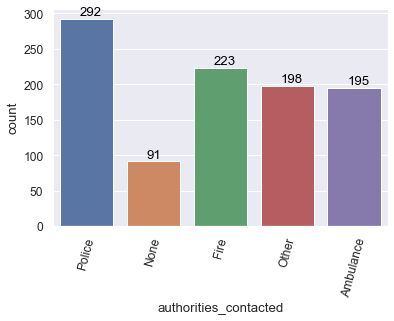

In [630]:
s=sns.countplot(data["authorities_contacted"])
s.set_xticklabels(s.get_xticklabels(),rotation=75);

for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

**Observation**
- Police authorities has been contacted more about the incident.

### Incident state

In [631]:
data["incident_state"].value_counts()

NY    261
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

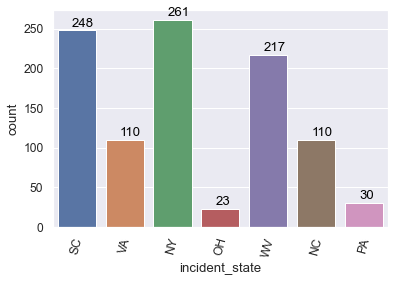

In [632]:
s=sns.countplot(data["incident_state"])
s.set_xticklabels(s.get_xticklabels(),rotation=75);

for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

### Incident City

In [633]:
data["incident_city"].value_counts()

Springfield    156
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

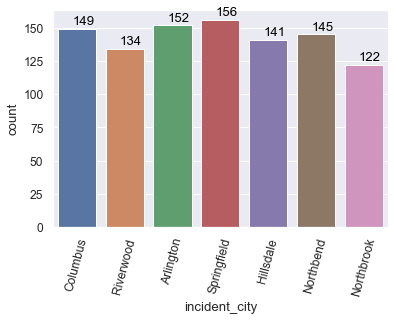

In [634]:
s=sns.countplot(data["incident_city"])
s.set_xticklabels(s.get_xticklabels(),rotation=75);

for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

### Incident Location

In [635]:
data["incident_location"].value_counts()

3492 Britain St           1
8080 Oak Lane             1
5022 1st St               1
8758 5th St               1
4116 Embaracadero Lane    1
                         ..
9562 4th Ridge            1
9278 Francis Ridge        1
9918 Andromedia Drive     1
7684 Francis Ridge        1
2193 4th Ridge            1
Name: incident_location, Length: 999, dtype: int64

**Observation**
- we can see incident location having different location of 999 records, for our analysis this coloumn would not require becuase it will not impact on our prediction but while encoding simply will lead to more columns which will increase the complexity and time consuming. so will drop this.

In [636]:
data.drop(["incident_location"],axis=1,inplace=True)

### Incident hour of the day

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

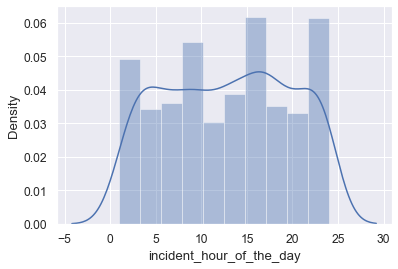

In [637]:
sns.distplot(data["incident_hour_of_the_day"])

**Observation**
- data pattern look like normal distribution

### Number of Vehicles involved

In [638]:
data["number_of_vehicles_involved"].value_counts()

1    581
3    358
2     30
4     30
Name: number_of_vehicles_involved, dtype: int64

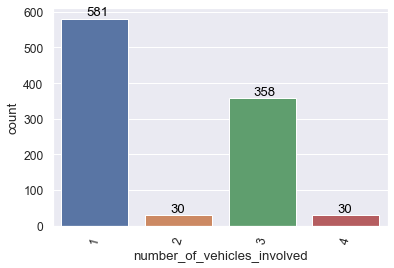

In [639]:
s=sns.countplot(data["number_of_vehicles_involved"])
s.set_xticklabels(s.get_xticklabels(),rotation=75);

for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

**Observation**
- We can see single vehicles incident is more compare to other.

### Property damage

In [640]:
data["property_damage"].value_counts()

NA     359
NO     338
YES    302
Name: property_damage, dtype: int64

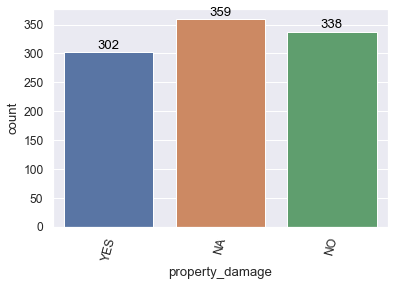

In [641]:
s=sns.countplot(data["property_damage"])
s.set_xticklabels(s.get_xticklabels(),rotation=75);

for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

**Observation**
- we can see there are lot of data which property damage is not known.

### Bodily injuries

In [642]:
data["bodily_injuries"].value_counts()

0    340
2    332
1    327
Name: bodily_injuries, dtype: int64

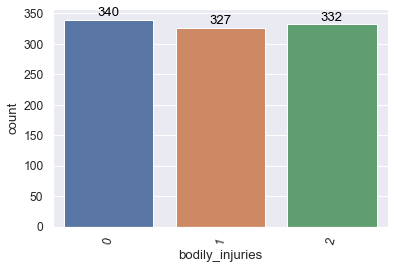

In [643]:
s=sns.countplot(data["bodily_injuries"])
s.set_xticklabels(s.get_xticklabels(),rotation=75);

for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

### Witnesses

In [644]:
data["witnesses"].value_counts()

1    257
2    250
0    249
3    243
Name: witnesses, dtype: int64

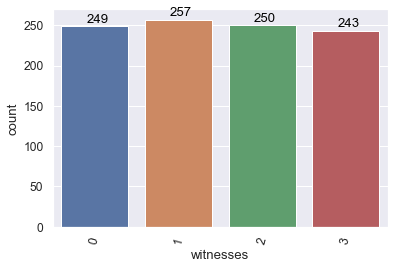

In [645]:
s=sns.countplot(data["witnesses"])
s.set_xticklabels(s.get_xticklabels(),rotation=75);

for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

### Police report available

In [646]:
data["police_report_available"].value_counts()

NA     343
NO     342
YES    314
Name: police_report_available, dtype: int64

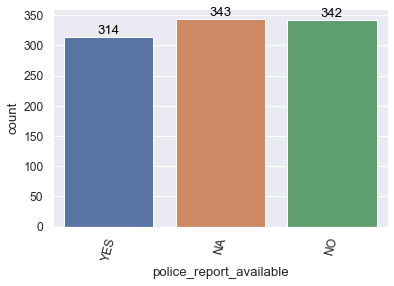

In [647]:
s=sns.countplot(data["police_report_available"])
s.set_xticklabels(s.get_xticklabels(),rotation=75);

for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

**Observation**
- Lots of data about police report is not avaialable.**

### Total Claim amount

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

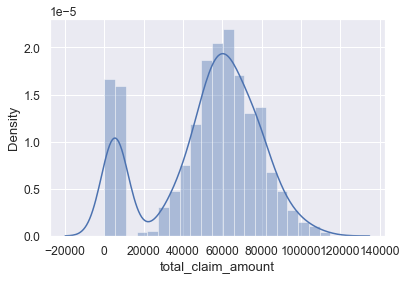

In [648]:
sns.distplot(data["total_claim_amount"])

**Observation**
- Its look like data is normally distributed.

### Injury claim

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

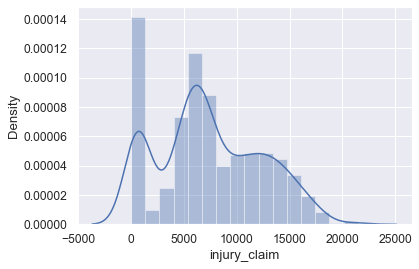

In [649]:
sns.distplot(data["injury_claim"])

**Observation**
- We can infer from the plot that there are some outliers due to which data is right side skeewed.

### Property claim

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

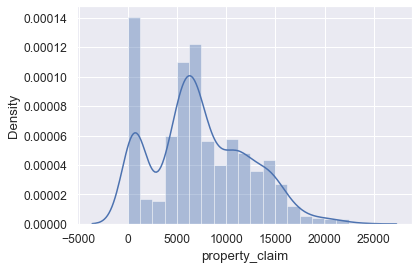

In [650]:
sns.distplot(data["property_claim"])

**Observation**
- we can see that in property claim there are high value of claim amount, due to which data distribution is skeewed right side.

### Vehicle claim

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

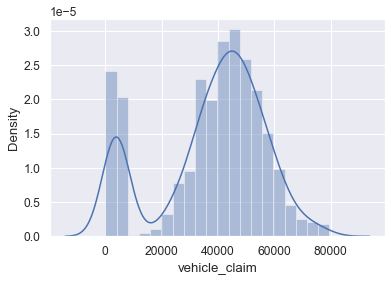

In [651]:
sns.distplot(data["vehicle_claim"])

**Observation**
- Data is normally distributed and also we have seen some 0 value claim.

### Auto make

In [652]:
data["auto_make"].value_counts()

Suburu        80
Saab          80
Dodge         80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        67
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

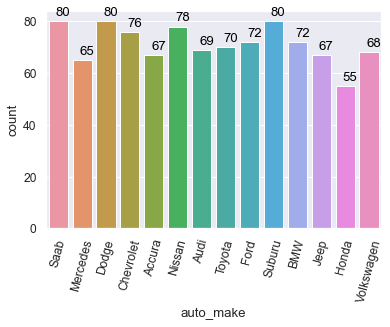

In [653]:
s=sns.countplot(data["auto_make"])
s.set_xticklabels(s.get_xticklabels(),rotation=75);

for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

### Auto model

In [654]:
data["auto_model"].value_counts()

RAM               43
Wrangler          42
Neon              37
A3                37
Jetta             35
MDX               35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Forrestor         28
92x               28
Camry             28
95                27
E400              27
F150              27
93                25
Grand Cherokee    25
Tahoe             24
Escape            24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
TL                20
Corolla           20
CRV               20
ML350             20
Impreza           20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

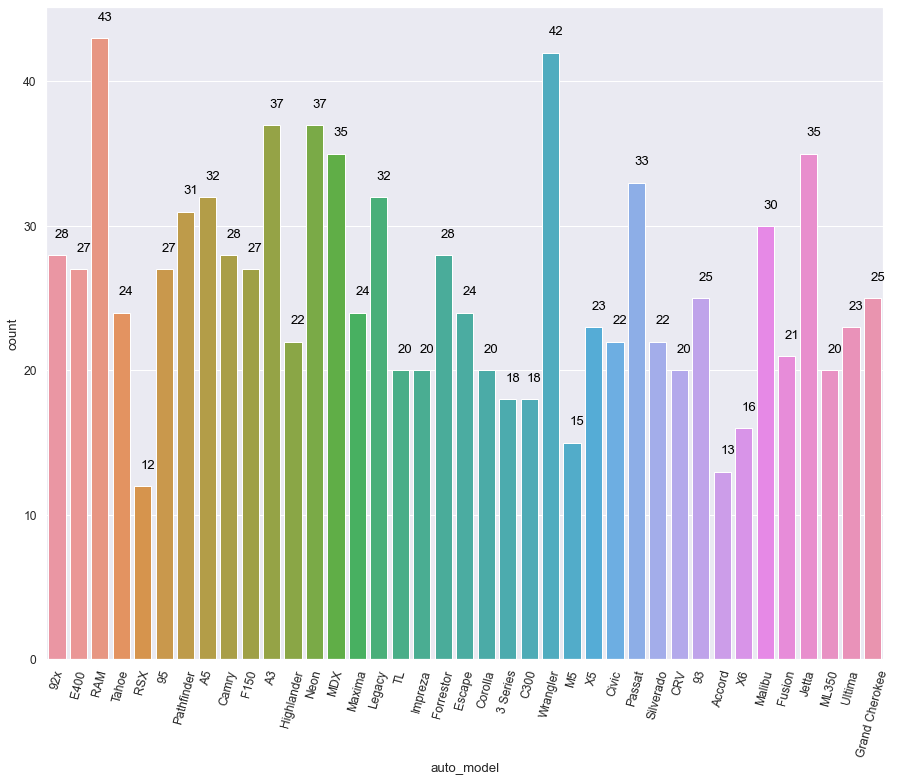

In [655]:
plt.figure(figsize=(15,12))
s=sns.countplot(data["auto_model"])
s.set_xticklabels(s.get_xticklabels(),rotation=75);

for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

### Auto year

In [656]:
data["auto_year"].value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    48
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

**Observation**
- Auto year columns will not have any impact on prediction so we will remove this columns.

In [657]:
data.drop("auto_year",axis=1,inplace=True)

### Fraud Reported

In [658]:
data["fraud_reported"].value_counts()

N    752
Y    247
Name: fraud_reported, dtype: int64

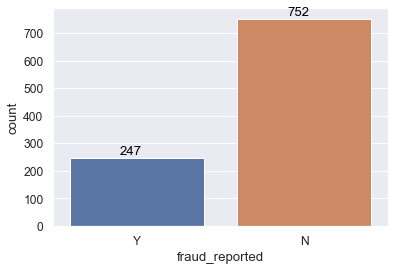

In [659]:
s=sns.countplot(data["fraud_reported"])
for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

**Observation**
- Fraud reported is target variable or dependent variable for our dataset, and we can see that our target variable is having inbalanced problem. So we have to deal with inbalanced target variable later.

## 6.2 Bivariate Analysis

### Age Vs Fraud_reported

<AxesSubplot:xlabel='age', ylabel='Count'>

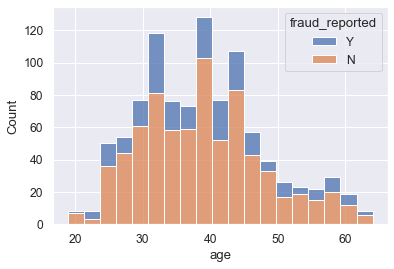

In [660]:
sns.histplot(x="age",hue="fraud_reported",data=data,multiple="stack")

In [661]:
pd.crosstab(data["age"],data["fraud_reported"])

fraud_reported,N,Y
age,,
19,0,1
20,1,0
21,6,0
22,0,1
23,3,4
24,8,2
25,10,4
26,18,8
27,21,3


### Policy state Vs Fraud reported

<AxesSubplot:xlabel='policy_state', ylabel='Count'>

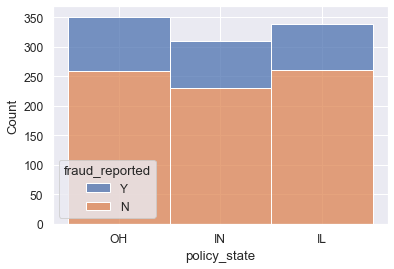

In [662]:
sns.histplot(x="policy_state",hue="fraud_reported",data=data,multiple="stack")

In [663]:
pd.crosstab(data["policy_state"],data["fraud_reported"],normalize=True)

fraud_reported,N,Y
policy_state,,
IL,0.261261,0.077077
IN,0.231231,0.079079
OH,0.260260,0.091091


**Observation**
- The fraud chaces of report is more if policy state is IN or OH.

### Policy Csl Vs Fraud reported

<AxesSubplot:xlabel='policy_csl', ylabel='Count'>

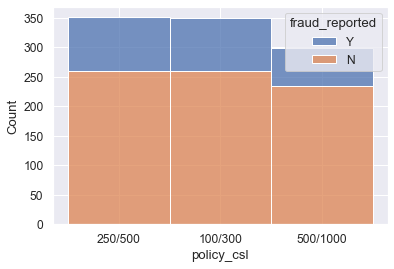

In [664]:
sns.histplot(x="policy_csl",hue="fraud_reported",data=data,multiple="stack")

In [665]:
pd.crosstab(data["policy_csl"],data["fraud_reported"],normalize=True)

fraud_reported,N,Y
policy_csl,,
100/300,0.259259,0.090090
250/500,0.259259,0.092092
500/1000,0.234234,0.065065


**As we can see that policy csl 500/1000 fraud reported is less than others.**

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Count'>

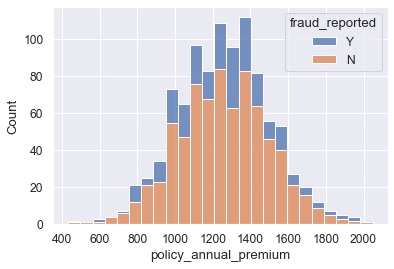

In [666]:
sns.histplot(x="policy_annual_premium",hue="fraud_reported",data=data,multiple="stack")

### Umbrella limit Vs Fraud reported

<AxesSubplot:xlabel='insured_sex', ylabel='Count'>

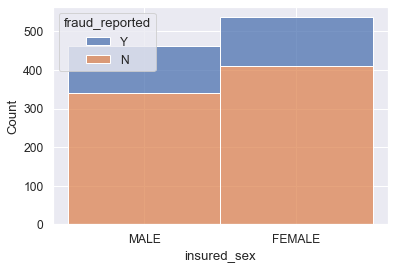

In [667]:
sns.histplot(x="insured_sex",hue="fraud_reported",data=data,multiple="stack")

In [668]:
pd.crosstab(data["insured_sex"],data["fraud_reported"],normalize=True)

fraud_reported,N,Y
insured_sex,,
FEMALE,0.411411,0.126126
MALE,0.341341,0.121121


**Observation**
- we can see that both male and female have equal chances of getting fraud.

### Incident type Vs Fraud reported

<AxesSubplot:xlabel='incident_type', ylabel='Count'>

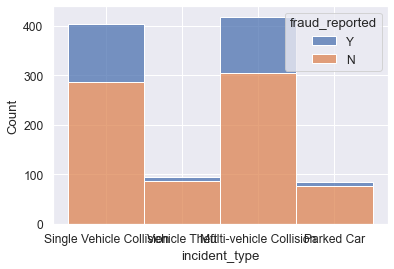

In [669]:
sns.histplot(x="incident_type",hue="fraud_reported",data=data,multiple="stack")


In [670]:
pd.crosstab(data["incident_type"],data["fraud_reported"],normalize=True)

fraud_reported,N,Y
incident_type,,
Multi-vehicle Collision,0.304304,0.114114
Parked Car,0.076076,0.008008
Single Vehicle Collision,0.286286,0.117117
Vehicle Theft,0.086086,0.008008


**Observation**
- We can infer from the above table that multi-vehicle collision and single vehicle collision type the chances is more reproted fraud.

### Collision Type VS Fraud Reported

<AxesSubplot:xlabel='collision_type', ylabel='Count'>

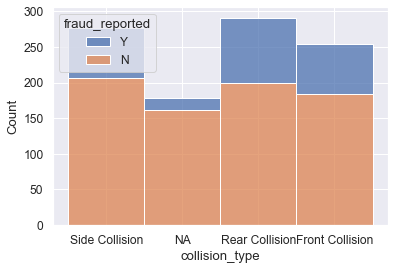

In [671]:
sns.histplot(x="collision_type",hue="fraud_reported",data=data,multiple="stack")

In [672]:
pd.crosstab(data["collision_type"],data["fraud_reported"],normalize=True)

fraud_reported,N,Y
collision_type,,
Front Collision,0.184184,0.070070
NA,0.162162,0.016016
Rear Collision,0.200200,0.091091
Side Collision,0.206206,0.070070


**Observation**
- Real type collision having more chances of reported fraund compare to others.

### Incident Severity VS Fraud reported

<AxesSubplot:xlabel='incident_severity', ylabel='Count'>

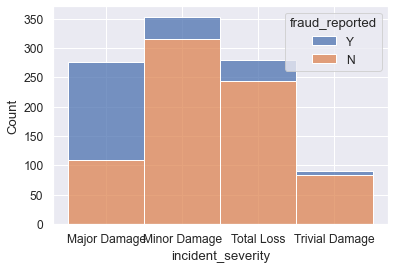

In [673]:
sns.histplot(x="incident_severity",hue="fraud_reported",data=data,multiple="stack")

In [674]:
pd.crosstab(data["incident_severity"],data["fraud_reported"],normalize=True)

fraud_reported,N,Y
incident_severity,,
Major Damage,0.109109,0.167167
Minor Damage,0.315315,0.038038
Total Loss,0.244244,0.036036
Trivial Damage,0.084084,0.006006


**Here we can analyse that mojor damage incident has been reported more fraud cases compare to other.**

### authorites contacted VS fraud reported

<AxesSubplot:xlabel='authorities_contacted', ylabel='Count'>

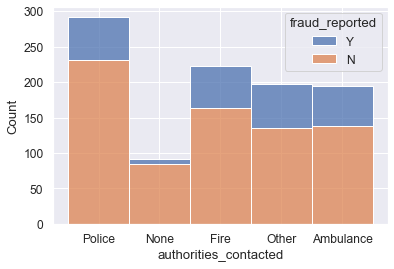

In [675]:
sns.histplot(x="authorities_contacted",hue="fraud_reported",data=data,multiple="stack")

In [676]:
pd.crosstab(data["authorities_contacted"],data["fraud_reported"],normalize=True)

fraud_reported,N,Y
authorities_contacted,,
Ambulance,0.138138,0.057057
Fire,0.163163,0.060060
None,0.085085,0.006006
Other,0.135135,0.063063
Police,0.231231,0.061061


**Observation**
- we can see that authorities contacted with Fire ,other and police having more cased where reported as fraud.**

<AxesSubplot:xlabel='incident_state', ylabel='Count'>

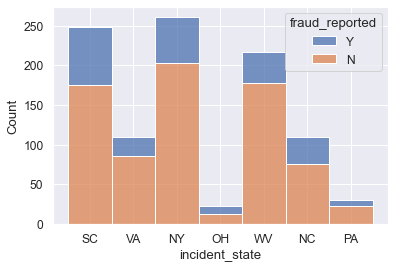

In [677]:
sns.histplot(x="incident_state",hue="fraud_reported",data=data,multiple="stack")

In [678]:
pd.crosstab(data["incident_state"],data["fraud_reported"],normalize=True)

fraud_reported,N,Y
incident_state,,
NC,0.076076,0.034034
NY,0.203203,0.058058
OH,0.013013,0.010010
PA,0.022022,0.008008
SC,0.175175,0.073073
VA,0.085085,0.025025
WV,0.178178,0.039039


**Observation**
- We can infere from the plot that state in SC,NY and NC having more cases reported as fraud.

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Count'>

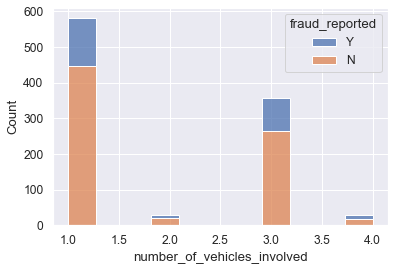

In [679]:
sns.histplot(x="number_of_vehicles_involved",hue="fraud_reported",data=data,multiple="stack")

In [680]:
pd.crosstab(data["number_of_vehicles_involved"],data["fraud_reported"],normalize=True)

fraud_reported,N,Y
number_of_vehicles_involved,,
1,0.448448,0.133133
2,0.021021,0.009009
3,0.264264,0.094094
4,0.019019,0.011011


**Observation**
- We can see that 1 and 3 number of vehicles involved has reported more cases of fraud.

### Bodily injuries Vs Fraud reported

<AxesSubplot:xlabel='bodily_injuries', ylabel='Count'>

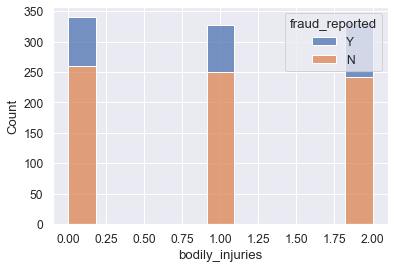

In [681]:
sns.histplot(x="bodily_injuries",hue="fraud_reported",data=data,multiple="stack")

In [682]:
pd.crosstab(data["bodily_injuries"],data["fraud_reported"],normalize=True)

fraud_reported,N,Y
bodily_injuries,,
0,0.260260,0.080080
1,0.250250,0.077077
2,0.242242,0.090090


**Observation**
- we can see bodily injuries with 2 having more cases of reported fraud.

### Witnesses VS Fraud reported

<AxesSubplot:xlabel='witnesses', ylabel='Count'>

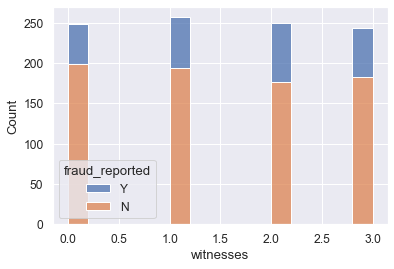

In [683]:
sns.histplot(x="witnesses",hue="fraud_reported",data=data,multiple="stack")

In [684]:
pd.crosstab(data["witnesses"],data["fraud_reported"],normalize=True)

fraud_reported,N,Y
witnesses,,
0,0.199199,0.050050
1,0.194194,0.063063
2,0.176176,0.074074
3,0.183183,0.060060


**Observation**
- We can see witnesses 2 having more chances of reported fraud compare to others.

### 6.3 Multivariate Analysis

In [685]:
numeric_feat.remove("auto_year")

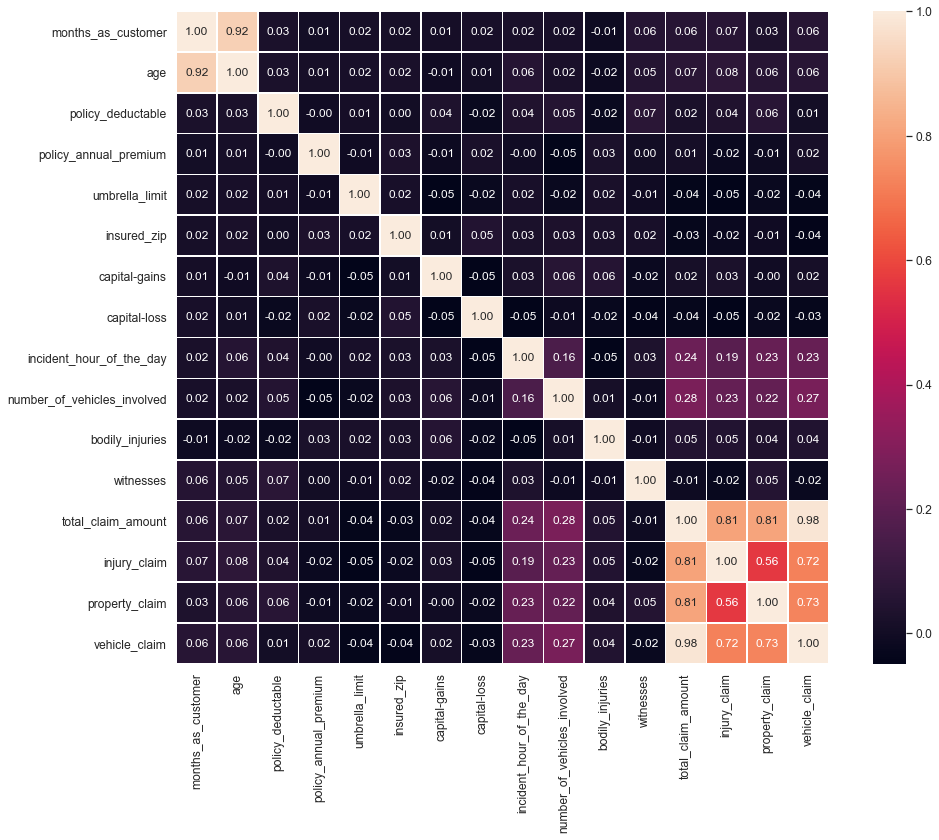

In [686]:
plt.subplots(figsize=(16,12))
cm=np.corrcoef(data[numeric_feat].values.T)
sns.set(font_scale=1.1)
heatmap=sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':12}, yticklabels = numeric_feat, xticklabels = numeric_feat,linewidths=.5)

**Observation**
- Total claim amount is highly correleated with vechile claim,property claim and injury claim

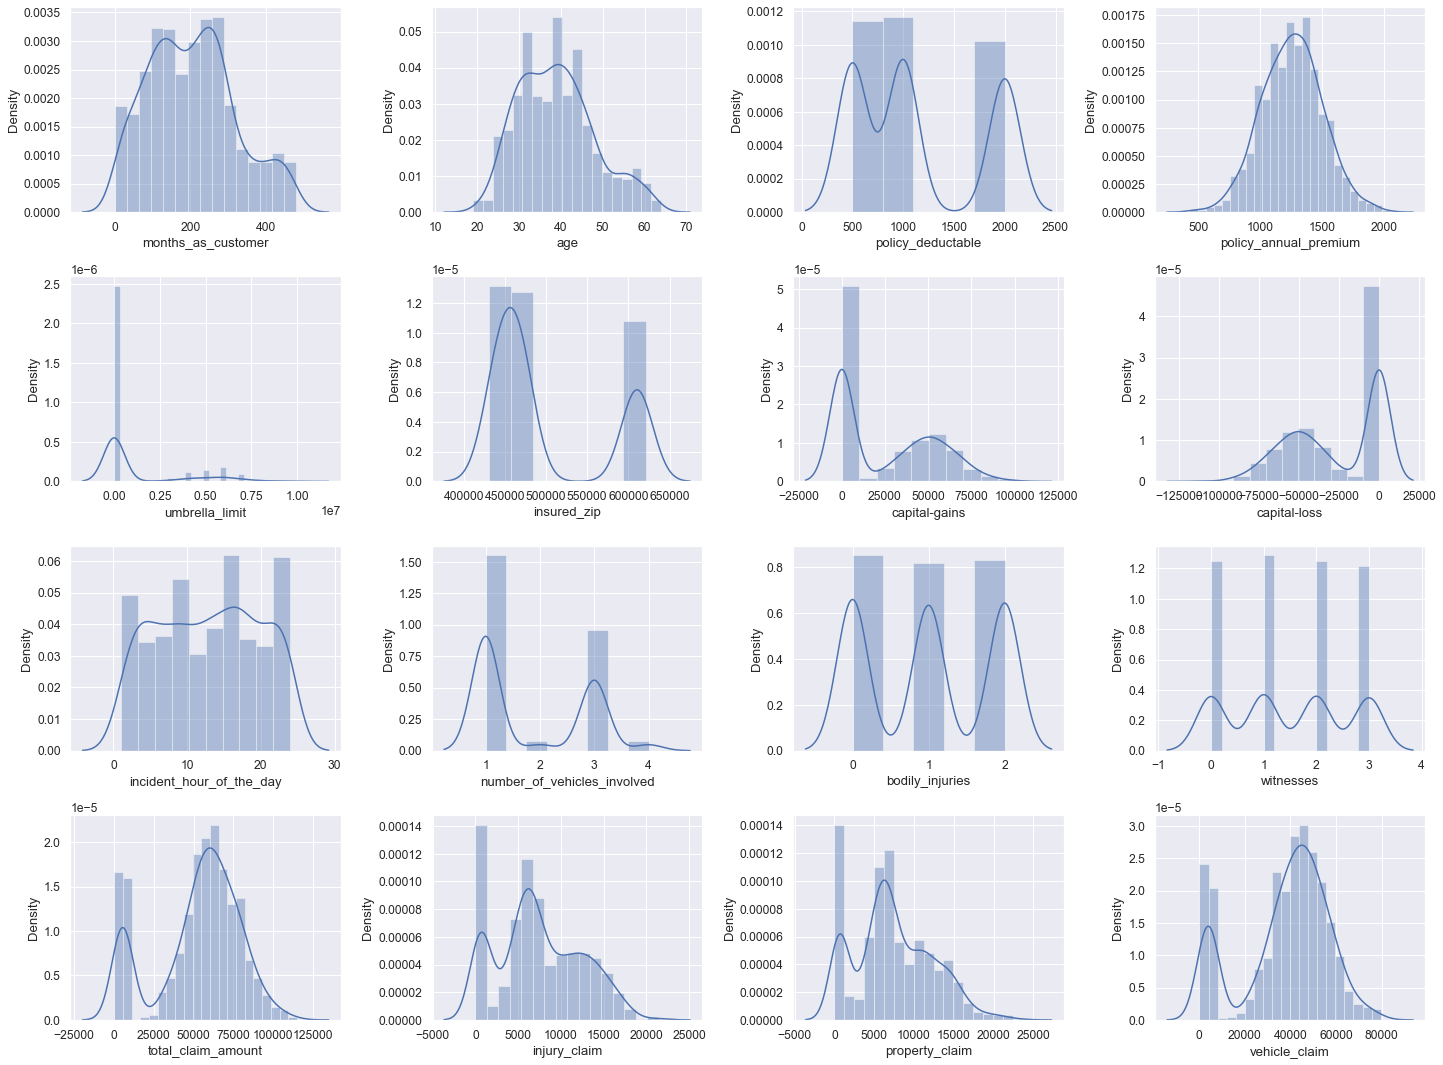

In [687]:
plt.figure(figsize=(20,15),facecolor="white")
plotnumber=1
for column in numeric_feat:
    if plotnumber <=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

**Observation**
- As we can see from above plot that property claim,umberala limit and property gain having some skeewness right side.

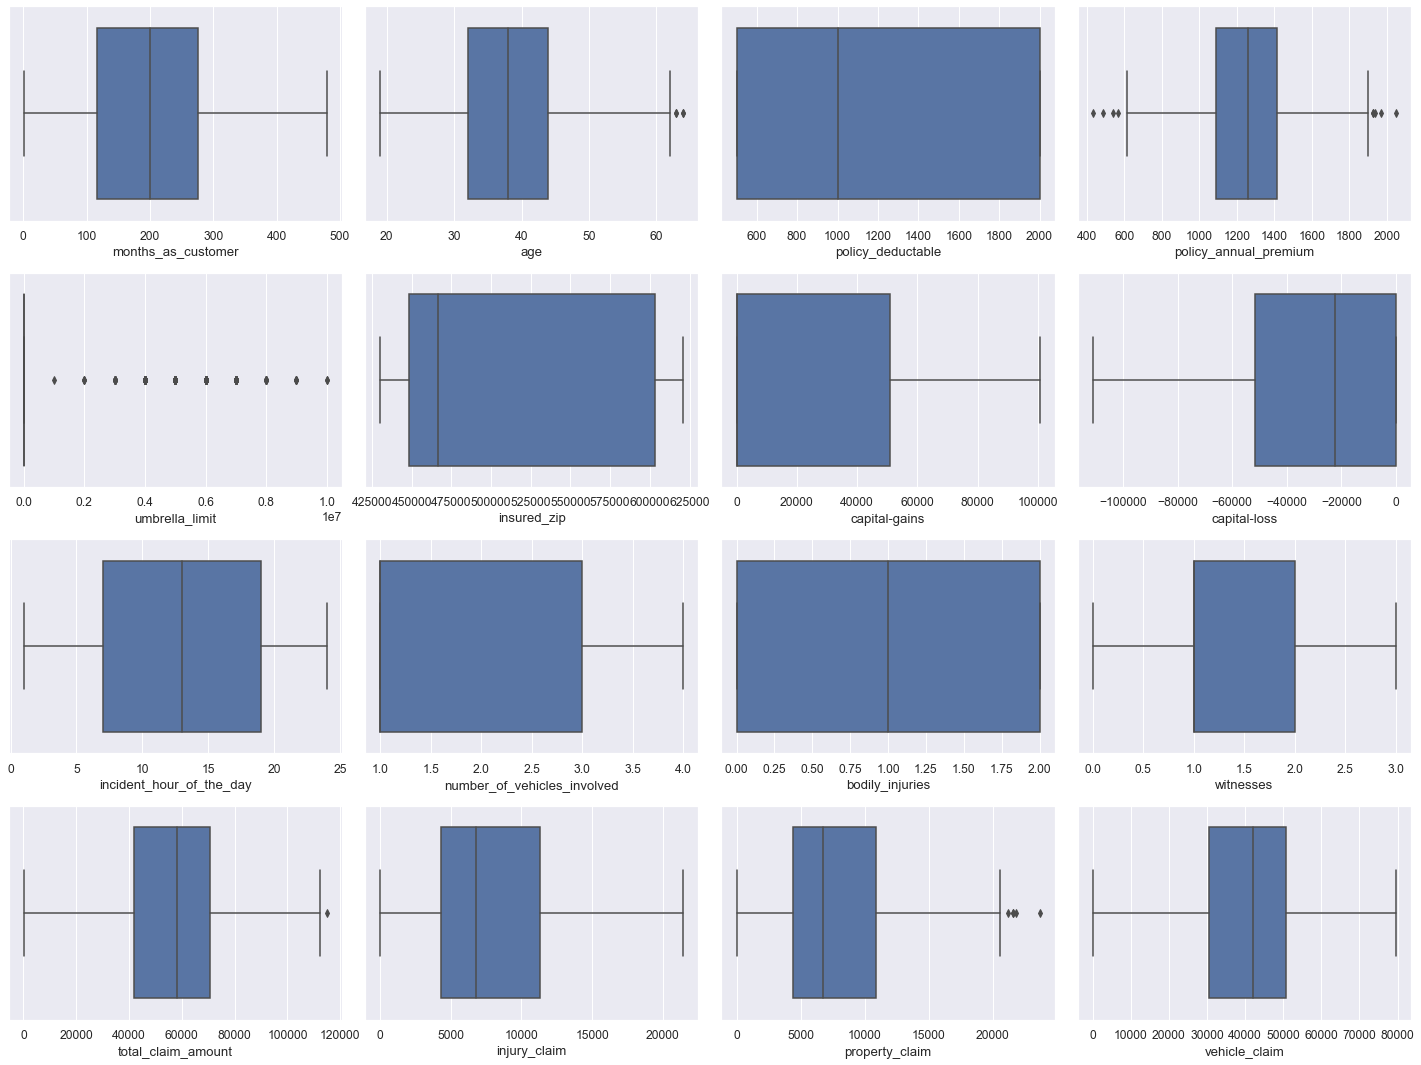

In [688]:
plt.figure(figsize=(20,15),facecolor="white")
plotnumber=1
for column in numeric_feat:
    if plotnumber <=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column])
    plotnumber+=1
plt.tight_layout()

**Observation**
- As we can see from above plot that age, policy annual premium,umberalla limit, total claim amount and property claim having outlier issue.

# 7. Checking Correlation of Categorical Variable

In [689]:
categorical_feat.remove("incident_location")

In [690]:
from scipy.stats import chi2_contingency
feature=[]
chisq=[]
for col in categorical_feat:
    CrosstabResult=pd.crosstab(data[col],columns=data["fraud_reported"])
    ChiSqresult=chi2_contingency(CrosstabResult)
    feature.append(col)
    Chisq=ChiSqresult[1]
    Chisq="{:.20f}".format(Chisq)
    chisq.append(Chisq)
    
    

In [691]:
P_value_chisqtest=pd.DataFrame({"Feature":feature,
                               "P_chisqtest":chisq})

In [692]:
P_value_chisqtest

,Feature,P_chisqtest
0,policy_state,0.59031889007176885364
1,policy_csl,0.35691602452947784885
2,insured_sex,0.35626054759942071826
3,insured_education_level,0.94264987732106098051
4,insured_occupation,0.16715156030209438187
5,insured_hobbies,0.00000000000000000000
6,insured_relationship,0.36295382060877590114
7,incident_type,0.00000205011879214423
8,collision_type,0.00000065414017178806
9,incident_severity,0.00000000000000000000


**Above we can say if the P_value chisqtest is more than 0.05 than the HO (the variable are not correleated with each other) will be accepted.

**The highly correleated with Target Variable features are:**
- insured_hobbies
- incident_type	
- collision_type	
- incident_severity	
- authorities_contacted



# 8. Dropping some categorical feature based on Chisqtest

**We have seen that there are lot of features in dataset, so while encoding the number of features will increase drastically.So to avoid complexity we will drop categorical features which are not having any impact on target variable.**

**Below are the top Categorical feature where P-value of chisqtest is very close to 1, which indicate that these feature are not having any impact on target variable, so we will removed below these features from the dataset.**
- Policy State
- insured education loan
- incident city
- police report available
- auto make

In [693]:
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported'],
      dtype='object')

In [694]:
data.drop(["policy_state","insured_education_level","incident_city","police_report_available","auto_make"],axis=1,inplace=True)

In [695]:
data.shape

(999, 29)

# 7. Feature Engineering

In [696]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_csl                   999 non-null    object 
 3   policy_deductable            999 non-null    int64  
 4   policy_annual_premium        999 non-null    float64
 5   umbrella_limit               999 non-null    int64  
 6   insured_zip                  999 non-null    int64  
 7   insured_sex                  999 non-null    object 
 8   insured_occupation           999 non-null    object 
 9   insured_hobbies              999 non-null    object 
 10  insured_relationship         999 non-null    object 
 11  capital-gains                999 non-null    int64  
 12  capital-loss                 999 non-null    int64  
 13  incident_type       

### Encoding policy_csl with Ordinal encoder

In [697]:
from sklearn.preprocessing import OrdinalEncoder

In [698]:
data["policy_csl"].value_counts()

250/500     351
100/300     349
500/1000    299
Name: policy_csl, dtype: int64

In [699]:
enc=OrdinalEncoder(categories=[["100/300","250/500","500/1000"]])

In [700]:
z=enc.fit_transform(data.policy_csl.values.reshape(-1,1))

In [701]:
data["policy_csl"]=z

In [702]:
data.shape

(999, 29)

### Encoding insured_sex columns with label Encoder

In [703]:
from sklearn.preprocessing import LabelEncoder

In [704]:
lab_enc=LabelEncoder()

In [705]:
z=lab_enc.fit_transform(data.insured_sex.values.reshape(-1,1))

In [706]:
data["insured_sex"]=z

In [707]:
data.shape

(999, 29)

### Encoding insured_occupation with one hot encoder

In [708]:
from sklearn.preprocessing import OneHotEncoder

In [709]:
onehotencoder=OneHotEncoder()

In [710]:
x=onehotencoder.fit_transform(data.insured_occupation.values.reshape(-1,1)).toarray()
j=data["insured_occupation"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["insured_occupation_"+str(i) for i in j.index])
data=pd.concat([data,dfOnehot],axis=1)

In [711]:
data.drop("insured_occupation",axis=1,inplace=True)

In [712]:
data.shape

(999, 42)

### Encoding insured_hobbies with one hot encoder

In [713]:
x=onehotencoder.fit_transform(data.insured_hobbies.values.reshape(-1,1)).toarray()
j=data["insured_hobbies"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["insured_hobbies"+str(i) for i in j.index])
data=pd.concat([data,dfOnehot],axis=1)
data.drop("insured_hobbies",axis=1,inplace=True)

In [714]:
data.shape

(999, 61)

### Encoding insured_relationship with one hot encoder

In [715]:
x=onehotencoder.fit_transform(data.insured_relationship.values.reshape(-1,1)).toarray()
j=data["insured_relationship"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["insured_relationship"+str(i) for i in j.index])
data=pd.concat([data,dfOnehot],axis=1)
data.drop("insured_relationship",axis=1,inplace=True)

In [716]:
data.shape

(999, 66)

### Encoding incident_type  with one hot encoder

In [717]:
data["incident_type"].value_counts()

Multi-vehicle Collision     418
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [718]:
x=onehotencoder.fit_transform(data.incident_type.values.reshape(-1,1)).toarray()
j=data["incident_type"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["incident_type"+str(i) for i in j.index])
data=pd.concat([data,dfOnehot],axis=1)
data.drop("incident_type",axis=1,inplace=True)

In [719]:
data.shape

(999, 69)

### Encoding collision_type  with one hot encoder

In [720]:
x=onehotencoder.fit_transform(data.collision_type.values.reshape(-1,1)).toarray()
j=data["collision_type"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["collision_type"+str(i) for i in j.index])
data=pd.concat([data,dfOnehot],axis=1)
data.drop("collision_type",axis=1,inplace=True)

In [721]:
data.shape

(999, 72)

### Encoding incident_severity  with one hot encoder

In [722]:
x=onehotencoder.fit_transform(data.incident_severity.values.reshape(-1,1)).toarray()
j=data["incident_severity"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["incident_severity"+str(i) for i in j.index])
data=pd.concat([data,dfOnehot],axis=1)
data.drop("incident_severity",axis=1,inplace=True)

In [723]:
data.shape

(999, 75)

### Encoding authorities_contacted  with one hot encoder

In [724]:
x=onehotencoder.fit_transform(data.authorities_contacted.values.reshape(-1,1)).toarray()
j=data["authorities_contacted"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["authorities_contacted"+str(i) for i in j.index])
data=pd.concat([data,dfOnehot],axis=1)
data.drop("authorities_contacted",axis=1,inplace=True)

In [725]:
data.shape

(999, 79)

### Encoding Incident state  with one hot encoder

In [726]:
x=onehotencoder.fit_transform(data.incident_state.values.reshape(-1,1)).toarray()
j=data["incident_state"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["incident_state"+str(i) for i in j.index])
data=pd.concat([data,dfOnehot],axis=1)
data.drop("incident_state",axis=1,inplace=True)

In [727]:
data.shape

(999, 85)

### Encoding property_damage  with one hot encoder

In [728]:
x=onehotencoder.fit_transform(data.property_damage.values.reshape(-1,1)).toarray()
j=data["property_damage"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["property_damage"+str(i) for i in j.index])
data=pd.concat([data,dfOnehot],axis=1)
data.drop("property_damage",axis=1,inplace=True)

In [729]:
data.shape

(999, 87)

### Encoding auto model  with one hot encoder

In [730]:
x=onehotencoder.fit_transform(data.auto_model.values.reshape(-1,1)).toarray()
j=data["auto_model"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["auto_model"+str(i) for i in j.index])
data=pd.concat([data,dfOnehot],axis=1)
data.drop("auto_model",axis=1,inplace=True)

In [731]:
data.shape

(999, 125)

# 8 Dealing Outliers for numerical features

**As we have seen in visualization process that numerical features having some outliers so we will deal with outliers**

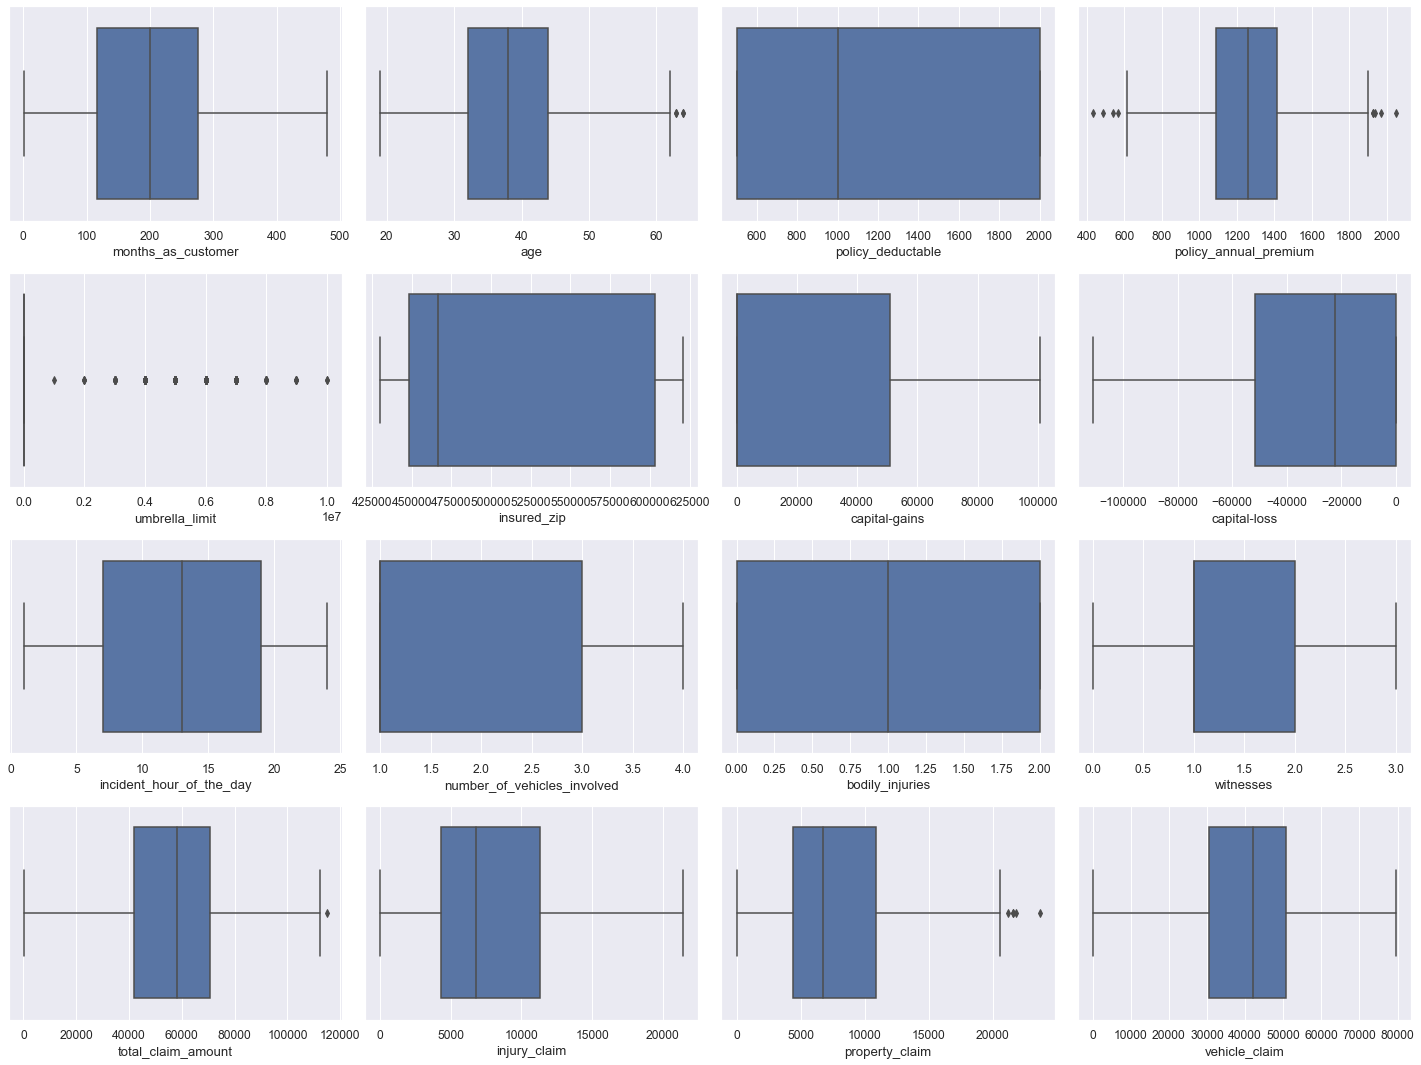

In [732]:
plt.figure(figsize=(20,15),facecolor="white")
plotnumber=1
for column in numeric_feat:
    if plotnumber <=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column])
    plotnumber+=1
plt.tight_layout()

### Dealing with Age feature

<AxesSubplot:xlabel='age'>

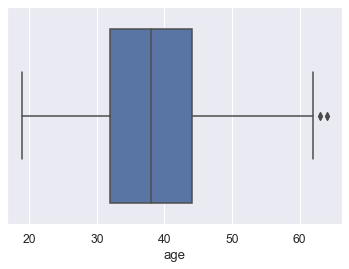

In [733]:
sns.boxplot(data["age"])

In [734]:
upper_limit=data["age"].mean()+3*data["age"].std()
lower_limit=data["age"].mean()-3*data["age"].std()

data["age"]=np.where(data["age"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["age"]<lower_limit,
                           lower_limit,
                           data["age"]
                        )
                    )

<AxesSubplot:xlabel='age'>

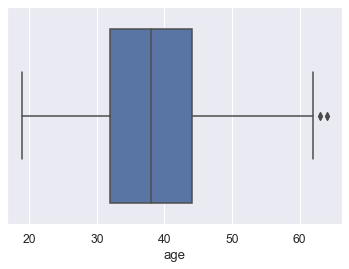

In [735]:
sns.boxplot(data["age"])

### Dealing with Policy annual premium feature

<AxesSubplot:xlabel='policy_annual_premium'>

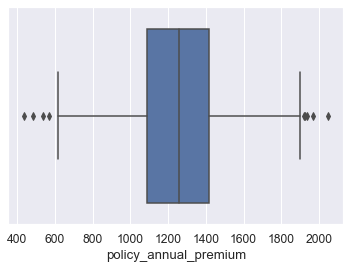

In [736]:
sns.boxplot(data["policy_annual_premium"])

In [737]:
upper_limit=data["policy_annual_premium"].mean()+3*data["policy_annual_premium"].std()
lower_limit=data["policy_annual_premium"].mean()-3*data["policy_annual_premium"].std()

data["policy_annual_premium"]=np.where(data["policy_annual_premium"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["policy_annual_premium"]<lower_limit,
                           lower_limit,
                           data["policy_annual_premium"]
                        )
                    )

<AxesSubplot:xlabel='policy_annual_premium'>

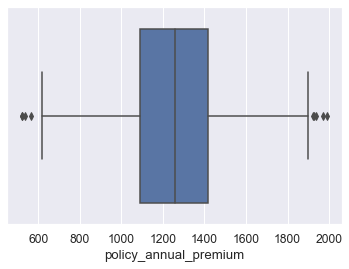

In [738]:
sns.boxplot(data["policy_annual_premium"])

### Dealing with Property claim

<AxesSubplot:xlabel='property_claim'>

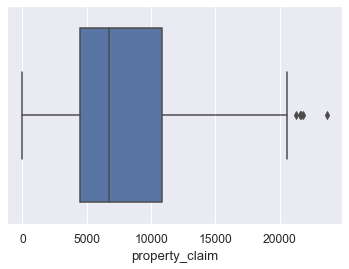

In [739]:
sns.boxplot(data["property_claim"])

In [740]:
upper_limit=data["property_claim"].mean()+3*data["property_claim"].std()
lower_limit=data["property_claim"].mean()-3*data["property_claim"].std()

data["property_claim"]=np.where(data["property_claim"]>upper_limit,
                        upper_limit,
                       np.where(
                           data["property_claim"]<lower_limit,
                           lower_limit,
                           data["property_claim"]
                        )
                    )

<AxesSubplot:xlabel='property_claim'>

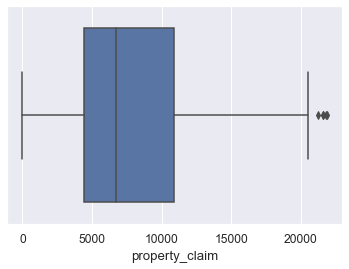

In [741]:
sns.boxplot(data["property_claim"])

# 9.Dealing with Skeewed featues

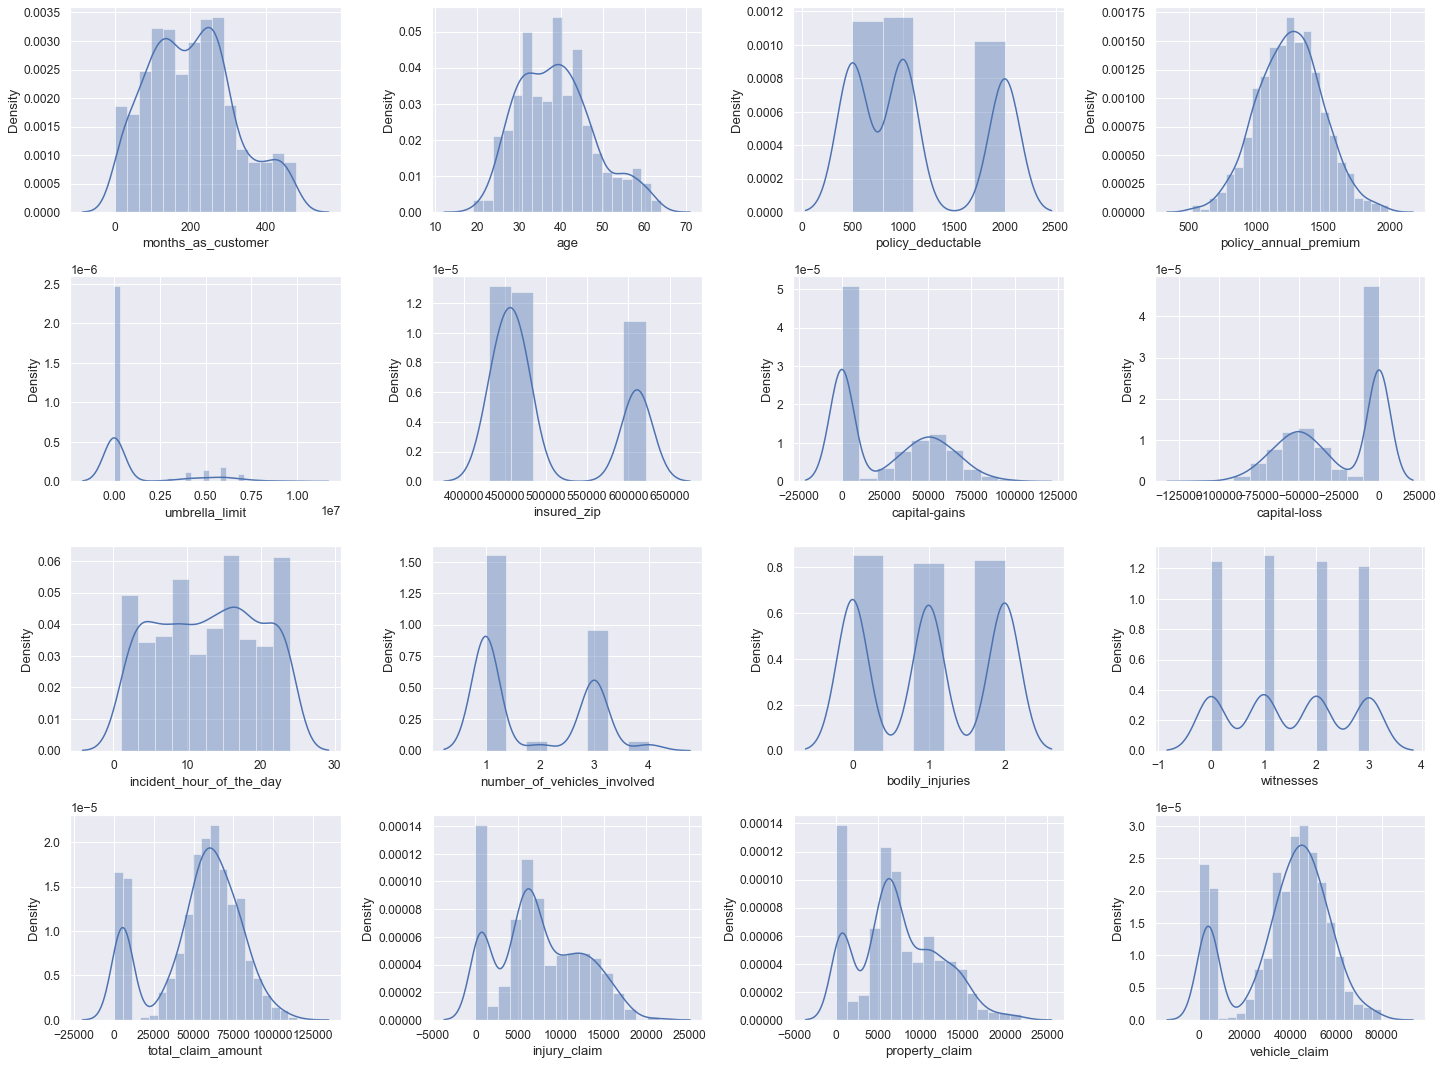

In [742]:
plt.figure(figsize=(20,15),facecolor="white")
plotnumber=1
for column in numeric_feat:
    if plotnumber <=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

In [743]:
numeric_data=data[numeric_feat]
numeric_data.skew()

months_as_customer             0.363976
age                            0.477319
policy_deductable              0.477027
policy_annual_premium          0.013807
umbrella_limit                 1.805522
insured_zip                    0.815075
capital-gains                  0.481534
capital-loss                  -0.392828
incident_hour_of_the_day      -0.038342
number_of_vehicles_involved    0.502593
bodily_injuries                0.014799
witnesses                      0.018399
total_claim_amount            -0.595869
injury_claim                   0.264193
property_claim                 0.368597
vehicle_claim                 -0.622731
dtype: float64

**As we can see umbrella limit, insured zip,total claim amount and vechile claim having skeewed data.**

### Dealing with umbrella limit with log function

In [744]:
data["umbrella_limit"]=np.log1p(data["umbrella_limit"])

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

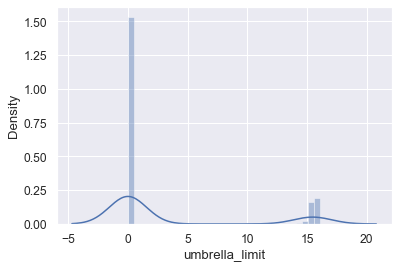

In [745]:
sns.distplot(data["umbrella_limit"])

### Dealing with insured_zip with log function

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

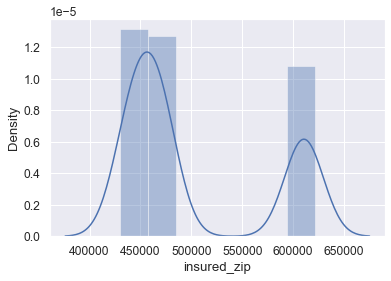

In [746]:
sns.distplot(data["insured_zip"])

In [747]:
data["insured_zip"]=np.log1p(data["insured_zip"])

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

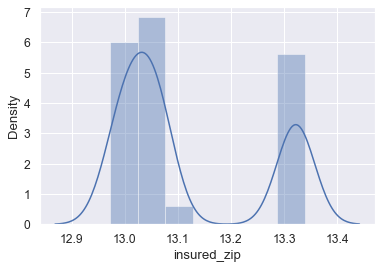

In [748]:
sns.distplot(data["insured_zip"])

### Dealing with total_claim_amount with log function

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

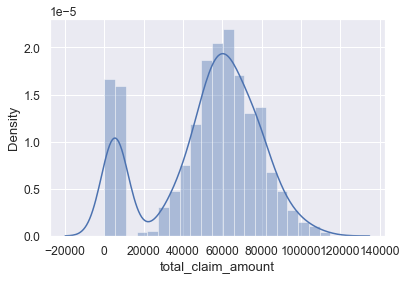

In [749]:
sns.distplot(data["total_claim_amount"])

In [750]:
data["total_claim_amount"]=np.log1p(data["total_claim_amount"])

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

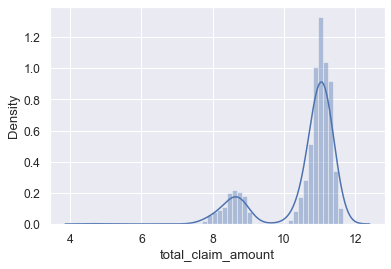

In [751]:
sns.distplot(data["total_claim_amount"])

### Dealing with vehicle_claim with log function

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

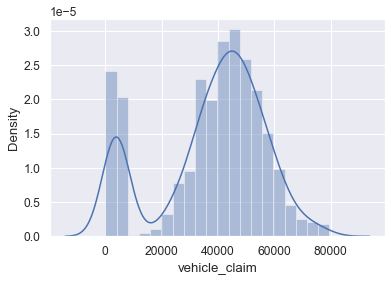

In [752]:
sns.distplot(data["vehicle_claim"])

In [753]:
data["vehicle_claim"]=np.log1p(data["vehicle_claim"])

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

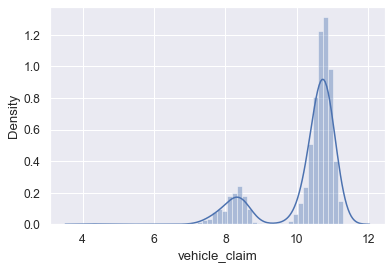

In [754]:
sns.distplot(data["vehicle_claim"])

# 10. Dealing with Inbalanced Target Variable

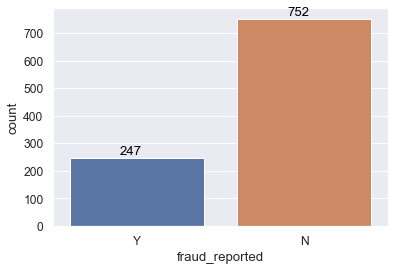

In [755]:
s=sns.countplot(data["fraud_reported"])
for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

**As we have found during visualization process that our target variable data is inbalanced so we will deal with inbalanced target variable.**

In [756]:
class_count_0,class_count_1=data["fraud_reported"].value_counts()

In [757]:
#Seperate class
class_0=data[data["fraud_reported"]=="N"]
class_1=data[data["fraud_reported"]=="Y"]

In [758]:
print("class 0:",class_0.shape)
print("class 1:",class_1.shape)

class 0: (752, 125)
class 1: (247, 125)


**Here we will use oversampling method becuase undersampling would remove lot of rows which could lead to loss of information.**

In [759]:
class_1_over=class_1.sample(class_count_0,replace=True)
test_over=pd.concat([class_1_over,class_0],axis=0)
print("total class of 1 and 0:",test_over["fraud_reported"].value_counts())

total class of 1 and 0: N    752
Y    752
Name: fraud_reported, dtype: int64


In [760]:
data=pd.DataFrame(test_over)

<AxesSubplot:title={'center':'count(target)'}>

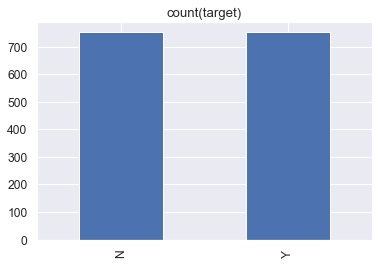

In [761]:
test_over["fraud_reported"].value_counts().plot(kind="bar",title="count(target)")

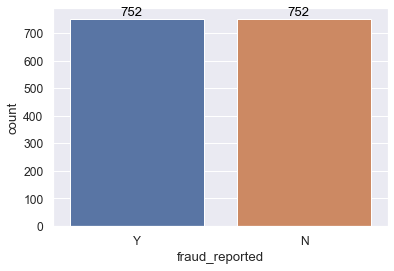

In [762]:
s=sns.countplot(data["fraud_reported"])
for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

In [763]:
data["fraud_reported"].replace("N",0,inplace=True)
data["fraud_reported"].replace("Y",1,inplace=True)

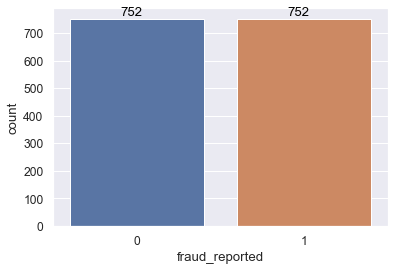

In [764]:
s=sns.countplot(data["fraud_reported"])
for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

In [765]:
data.shape

(1504, 125)

In [766]:
data.reset_index(drop=True,inplace=True)

In [767]:
data.shape

(1504, 125)

In [768]:
data_types_dict={"fraud_reported":int}

In [769]:
data=data.astype(data_types_dict)

In [770]:
data.shape

(1504, 125)

# 11.Split Train and test dataset

In [771]:
x=data.drop("fraud_reported",axis=1)

In [772]:
y=data.fraud_reported

In [773]:
x.shape

(1504, 124)

In [774]:
y.shape

(1504,)

# 12 Scaling Transformation with Standard Scaler

In [775]:
from sklearn.preprocessing import StandardScaler

In [776]:
scaler=StandardScaler()

In [777]:
x_scaled=scaler.fit_transform(x)

In [778]:
x_scaled.shape

(1504, 124)

# 13 Feature Extracting with PCA

In [779]:
from sklearn.decomposition import PCA

In [780]:
pca=PCA()

In [781]:
principalcomponent=pca.fit_transform(x_scaled)

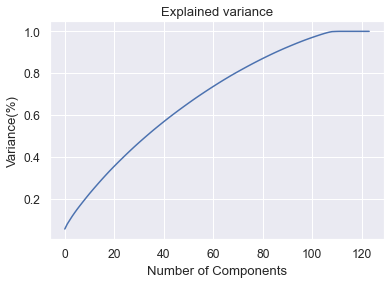

In [782]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance(%)")
plt.title("Explained variance")
plt.show()

**As we can see more than 90 component the model covers more than 90% of variance.but we will see accuracy without removing any featues.**

In [783]:
pca=PCA(n_components=90)

In [784]:
new_data_pca=pca.fit_transform(x_scaled)

# Model Building

# 14.1 Logistic Regression

In [785]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [786]:
lr=LogisticRegression()

# 14.2 Choosing best random state for our model

In [787]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,plot_confusion_matrix


In [788]:
for i in range(0,1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"Model perfrom well")
        print("At random state",i)
        print("Training accuracy score is-",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy score is-",accuracy_score(y_test,pred_test)*100)
   

At random state 518 Model perfrom well
At random state 518
Training accuracy score is- 88.49809885931559
Testing accuracy score is- 88.49557522123894
At random state 524 Model perfrom well
At random state 524
Training accuracy score is- 88.11787072243345
Testing accuracy score is- 88.05309734513274
At random state 1192 Model perfrom well
At random state 1192
Training accuracy score is- 88.30798479087453
Testing accuracy score is- 88.27433628318585
At random state 1287 Model perfrom well
At random state 1287
Training accuracy score is- 87.83269961977186
Testing accuracy score is- 87.83185840707965


**We can choose best CV 1287**

In [789]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=1287)

In [790]:
lr=LogisticRegression()

In [791]:
lr.fit(x_train,y_train)

LogisticRegression()

## 14.3 Evaluation matrix

In [792]:
y_pred=lr.predict(x_test)

In [793]:
accuracy_score(y_test,y_pred)

0.8783185840707964

In [794]:
confusion_matrix(y_test,y_pred)

array([[196,  30],
       [ 25, 201]], dtype=int64)

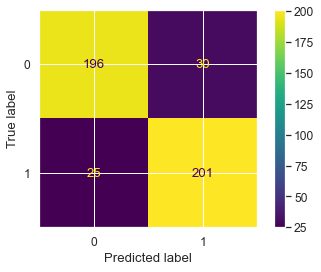

In [795]:
plot_confusion_matrix(lr,x_test,y_test,values_format=".4g")

In [796]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       226
           1       0.87      0.89      0.88       226

    accuracy                           0.88       452
   macro avg       0.88      0.88      0.88       452
weighted avg       0.88      0.88      0.88       452



## 14.4 Finding Best CV for model

In [797]:
from sklearn.model_selection import cross_val_score,cross_validate

In [798]:
for j in range(2,12):
    lr_score=cross_val_score(lr,x_scaled,y,cv=j)
    lr_s=lr_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",lr_score*100)
    print("Accuracy Score:",lr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [80.71808511 82.84574468]
Accuracy Score: 81.78191489361701


At CV:- 3
Cross validation score is: [84.66135458 82.43512974 83.63273453]
Accuracy Score: 83.5764062843768


At CV:- 4
Cross validation score is: [86.43617021 82.18085106 82.9787234  84.30851064]
Accuracy Score: 83.97606382978722


At CV:- 5
Cross validation score is: [87.37541528 82.05980066 82.39202658 86.04651163 84.        ]
Accuracy Score: 84.37475083056478


At CV:- 6
Cross validation score is: [86.85258964 83.66533865 81.67330677 82.8685259  85.6        85.6       ]
Accuracy Score: 84.37662682602922


At CV:- 7
Cross validation score is: [85.58139535 86.04651163 82.3255814  84.65116279 83.72093023 86.04651163
 85.51401869]
Accuracy Score: 84.84087310212064


At CV:- 8
Cross validation score is: [84.57446809 87.76595745 81.91489362 81.91489362 82.9787234  85.10638298
 86.70212766 86.17021277]
Accuracy Score: 84.6409574468085


At CV:- 9
Cross validation score is: [85.11904762 90.41

**We can choose cv at 11.**

In [799]:
cross_val_score(lr,x_scaled,y,cv=10)

array([0.85430464, 0.91390728, 0.8410596 , 0.8410596 , 0.82666667,
       0.83333333, 0.87333333, 0.87333333, 0.86666667, 0.88      ])

In [800]:
lr_cv_score=cross_val_score(lr,x_scaled,y,cv=10).mean()

In [801]:
lr_cv_score

0.8603664459161149

In [802]:
lr_acc_score=accuracy_score(y_test,y_pred)

In [803]:
lr_acc_score

0.8783185840707964

# 15.1 RandomForest Classifier

In [804]:
from sklearn.ensemble import RandomForestClassifier

In [806]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=1287)

In [807]:
rfc=RandomForestClassifier()

In [808]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

## 15.2 Evaluation Matrix

In [809]:
y_pred=rfc.predict(x_test)

In [810]:
rfc_acc_score=accuracy_score(y_test,y_pred)

In [811]:
rfc_acc_score

0.9092920353982301

In [812]:
confusion_matrix(y_test,y_pred)

array([[200,  26],
       [ 15, 211]], dtype=int64)

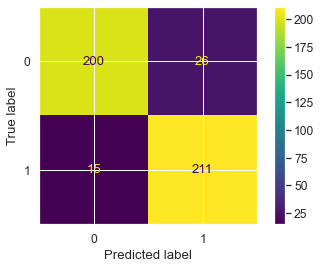

In [813]:
plot_confusion_matrix(rfc,x_test,y_test,values_format=".4g")

In [814]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       226
           1       0.89      0.93      0.91       226

    accuracy                           0.91       452
   macro avg       0.91      0.91      0.91       452
weighted avg       0.91      0.91      0.91       452



## 15.3 Finding Best CV for model

In [815]:
for j in range(2,12):
    rfc_score=cross_val_score(rfc,x_scaled,y,cv=j)
    rfc_s=rfc_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",rfc_score*100)
    print("Accuracy Score:",rfc_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [88.03191489 89.7606383 ]
Accuracy Score: 88.89627659574468


At CV:- 3
Cross validation score is: [90.83665339 89.82035928 93.01397206]
Accuracy Score: 91.22366157459318


At CV:- 4
Cross validation score is: [90.42553191 90.69148936 89.62765957 94.14893617]
Accuracy Score: 91.22340425531915


At CV:- 5
Cross validation score is: [91.69435216 90.03322259 91.02990033 91.02990033 93.66666667]
Accuracy Score: 91.4908084163898


At CV:- 6
Cross validation score is: [92.03187251 92.03187251 90.43824701 90.03984064 91.6        92.8       ]
Accuracy Score: 91.49030544488711


At CV:- 7
Cross validation score is: [91.1627907  91.1627907  90.23255814 93.95348837 88.37209302 93.48837209
 92.52336449]
Accuracy Score: 91.55649392989102


At CV:- 8
Cross validation score is: [92.0212766  91.4893617  91.4893617  90.95744681 90.42553191 89.89361702
 96.27659574 91.4893617 ]
Accuracy Score: 91.75531914893618


At CV:- 9
Cross validation score is: [91.07142857 91.0

In [816]:
cross_val_score(rfc,x_scaled,y,cv=9)

array([0.9047619 , 0.92814371, 0.91616766, 0.90419162, 0.94011976,
       0.89820359, 0.92814371, 0.96407186, 0.91616766])

In [817]:
rfc_cv_score=cross_val_score(rfc,x_scaled,y,cv=9).mean()

In [818]:
rfc_cv_score

0.9182230776542154

In [819]:
rfc_acc_score

0.9092920353982301

# 16.1 Decision Tree

In [820]:
from sklearn.tree import DecisionTreeClassifier

In [821]:
dtc=DecisionTreeClassifier()

In [825]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=1287)

In [826]:
dtc=DecisionTreeClassifier()

In [827]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

## 16.2 Evalution Matrix

In [828]:
y_pred=dtc.predict(x_test)

In [829]:
dtc_acc_score=accuracy_score(y_test,y_pred)

In [830]:
dtc_acc_score

0.8783185840707964

In [831]:
confusion_matrix(y_test,y_pred)

array([[194,  32],
       [ 23, 203]], dtype=int64)

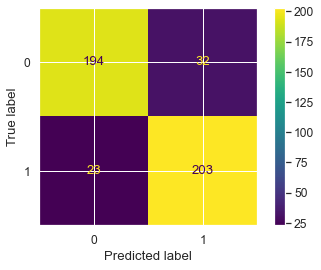

In [832]:
plot_confusion_matrix(dtc,x_test,y_test,values_format=".4g")

In [833]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       226
           1       0.86      0.90      0.88       226

    accuracy                           0.88       452
   macro avg       0.88      0.88      0.88       452
weighted avg       0.88      0.88      0.88       452



## 16.3 Finding Best CV for model

In [834]:
for j in range(2,12):
    dtc_score=cross_val_score(dtc,x_scaled,y,cv=j)
    dtc_s=dtc_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",dtc_score*100)
    print("Accuracy Score:",dtc_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [85.63829787 85.50531915]
Accuracy Score: 85.5718085106383


At CV:- 3
Cross validation score is: [91.63346614 87.4251497  89.42115768]
Accuracy Score: 89.49325784022925


At CV:- 4
Cross validation score is: [92.55319149 90.15957447 87.5        90.69148936]
Accuracy Score: 90.22606382978722


At CV:- 5
Cross validation score is: [92.35880399 91.02990033 89.36877076 88.70431894 90.        ]
Accuracy Score: 90.29235880398672


At CV:- 6
Cross validation score is: [92.03187251 91.23505976 88.84462151 92.03187251 91.2        91.6       ]
Accuracy Score: 91.15723771580346


At CV:- 7
Cross validation score is: [86.97674419 91.62790698 88.8372093  92.09302326 88.37209302 93.48837209
 91.12149533]
Accuracy Score: 90.35954916633028


At CV:- 8
Cross validation score is: [88.82978723 88.82978723 92.0212766  89.36170213 89.89361702 91.4893617
 94.14893617 85.63829787]
Accuracy Score: 90.02659574468086


At CV:- 9
Cross validation score is: [91.07142857 91.61

**We can choose best CV 11**

In [835]:
cross_val_score(dtc,x,y,cv=11)

array([0.89051095, 0.89781022, 0.90510949, 0.91970803, 0.89051095,
       0.91970803, 0.89051095, 0.8540146 , 0.88235294, 0.93382353,
       0.88235294])

In [836]:
dtc_cv_score=cross_val_score(dtc,x,y,cv=11).mean()

In [837]:
dtc_cv_score

0.9049192005933094

In [838]:
dtc_acc_score

0.8783185840707964

## 17.1 Ada Boost Classifier

In [839]:
from sklearn.ensemble import AdaBoostClassifier

In [840]:
adc=AdaBoostClassifier()

In [841]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=1287)

In [842]:
adc.fit(x_train,y_train)

AdaBoostClassifier()

# 17.2 Evaluation Matrix

In [843]:
y_pred=adc.predict(x_test)

In [844]:
adc_acc_score=accuracy_score(y_test,y_pred)

In [845]:
adc_acc_score

0.8429203539823009

In [846]:
confusion_matrix(y_test,y_pred)

array([[191,  35],
       [ 36, 190]], dtype=int64)

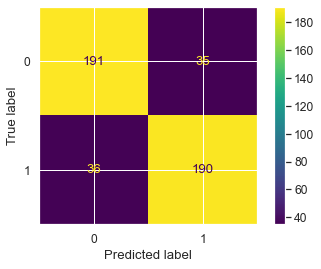

In [847]:
plot_confusion_matrix(adc,x_test,y_test,values_format=".4g")

In [848]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       226
           1       0.84      0.84      0.84       226

    accuracy                           0.84       452
   macro avg       0.84      0.84      0.84       452
weighted avg       0.84      0.84      0.84       452



## 17.3 Finding Best CV for model

In [849]:
for j in range(2,12):
    adc_score=cross_val_score(adc,x_scaled,y,cv=j)
    adc_s=adc_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",adc_score*100)
    print("Accuracy Score:",adc_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [82.84574468 84.84042553]
Accuracy Score: 83.84308510638299


At CV:- 3
Cross validation score is: [82.27091633 82.03592814 85.22954092]
Accuracy Score: 83.17879513217919


At CV:- 4
Cross validation score is: [84.84042553 80.05319149 83.24468085 87.5       ]
Accuracy Score: 83.90957446808511


At CV:- 5
Cross validation score is: [84.71760797 82.05980066 79.06976744 86.04651163 84.        ]
Accuracy Score: 83.17873754152825


At CV:- 6
Cross validation score is: [82.8685259  83.26693227 81.2749004  84.46215139 84.8        85.2       ]
Accuracy Score: 83.64541832669325


At CV:- 7
Cross validation score is: [81.39534884 86.04651163 81.86046512 83.72093023 81.39534884 85.11627907
 85.98130841]
Accuracy Score: 83.64517030459217


At CV:- 8
Cross validation score is: [83.5106383  87.76595745 85.63829787 84.57446809 84.04255319 85.63829787
 87.23404255 84.57446809]
Accuracy Score: 85.37234042553192


At CV:- 9
Cross validation score is: [85.71428571 89.

**We can choose best CV 11**

In [850]:
cross_val_score(adc,x_scaled,y,cv=9)

array([0.85714286, 0.89820359, 0.84431138, 0.82634731, 0.85628743,
       0.81437126, 0.86826347, 0.88023952, 0.86227545])

In [851]:
adc_cv_score=cross_val_score(adc,x_scaled,y,cv=9).mean()

In [852]:
adc_cv_score

0.8563824731489401

In [853]:
adc_acc_score

0.8429203539823009

# 18.1 Gradient Boosting Classifier

In [854]:
from sklearn.ensemble import GradientBoostingClassifier

In [855]:
gbc=GradientBoostingClassifier()

In [856]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

## 18.2 Evaluation Matrix

In [857]:
y_pred=gbc.predict(x_test)

In [858]:
gbc_acc_score=accuracy_score(y_test,y_pred)

In [859]:
gbc_acc_score

0.8960176991150443

In [860]:
confusion_matrix(y_test,y_pred)

array([[196,  30],
       [ 17, 209]], dtype=int64)

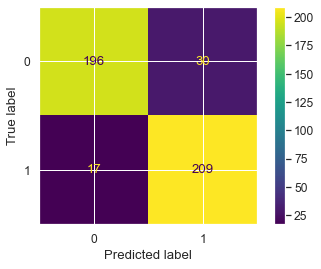

In [861]:
plot_confusion_matrix(gbc,x_test,y_test,values_format=".4g")

In [862]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       226
           1       0.87      0.92      0.90       226

    accuracy                           0.90       452
   macro avg       0.90      0.90      0.90       452
weighted avg       0.90      0.90      0.90       452



## 18.3 Choosing Best CV for model

In [863]:
for j in range(2,12):
    gbc_score=cross_val_score(gbc,x_scaled,y,cv=j)
    gbc_s=gbc_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",gbc_score*100)
    print("Accuracy Score:",gbc_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [86.96808511 89.62765957]
Accuracy Score: 88.29787234042553


At CV:- 3
Cross validation score is: [88.84462151 85.42914172 90.41916168]
Accuracy Score: 88.2309749690526


At CV:- 4
Cross validation score is: [88.03191489 86.43617021 89.09574468 91.22340426]
Accuracy Score: 88.69680851063829


At CV:- 5
Cross validation score is: [89.36877076 88.03986711 86.04651163 89.36877076 91.66666667]
Accuracy Score: 88.89811738648949


At CV:- 6
Cross validation score is: [88.44621514 88.84462151 84.06374502 88.44621514 90.4        91.6       ]
Accuracy Score: 88.63346613545818


At CV:- 7
Cross validation score is: [85.58139535 90.23255814 84.65116279 90.69767442 88.37209302 90.69767442
 89.71962617]
Accuracy Score: 88.56459775825131


At CV:- 8
Cross validation score is: [86.70212766 89.89361702 86.17021277 87.76595745 88.82978723 89.36170213
 92.55319149 88.82978723]
Accuracy Score: 88.76329787234043


At CV:- 9
Cross validation score is: [84.52380952 91.0

**we can choose best cv 8.**

In [864]:
cross_val_score(gbc,x_scaled,y,cv=8)

array([0.86702128, 0.89893617, 0.86170213, 0.87765957, 0.89361702,
       0.89361702, 0.93085106, 0.88297872])

In [865]:
gbc_cv_score=cross_val_score(gbc,x_scaled,y,cv=8).mean()

In [866]:
gbc_cv_score

0.8856382978723405

In [867]:
gbc_acc_score

0.8960176991150443

# 19.Lets choose the best model with ROC AUC Curve

In [868]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [869]:
lr_pred=lr.predict(x_test)
rfc_pred=rfc.predict(x_test)
dtc_pred=dtc.predict(x_test)
adc_pred=adc.predict(x_test)
gbc_pred=gbc.predict(x_test)

In [870]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, lr_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, rfc_pred, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, dtc_pred, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, adc_pred, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, gbc_pred, pos_label=1)

In [871]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [872]:
# auc scores
auc_score_lr = roc_auc_score(y_test, lr_pred)
auc_score_rfc = roc_auc_score(y_test, rfc_pred)
auc_score_dtc = roc_auc_score(y_test, dtc_pred)
auc_score_adc = roc_auc_score(y_test, adc_pred)
auc_score_gbc = roc_auc_score(y_test, gbc_pred)
print(round(auc_score_lr,2)*100,round(auc_score_rfc,2)*100,round(auc_score_dtc,2)*100,round(auc_score_adc,2)*100,round(auc_score_gbc,2)*100)

88.0 91.0 88.0 84.0 90.0


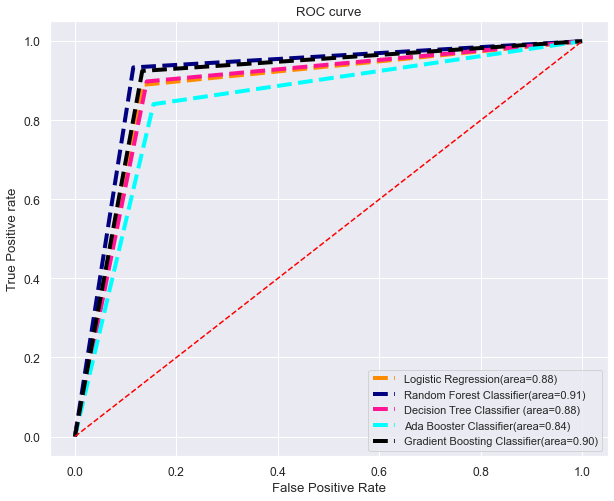

In [873]:
plt.figure(figsize=(10,8))
plt.plot(fpr1, tpr1, linestyle='--',color='darkorange',linewidth=4, label='Logistic Regression(area=%0.2f)'% auc_score_lr)
plt.plot(fpr2,tpr2,linestyle='--',color='navy',linewidth=4, label='Random Forest Classifier(area=%0.2f)'% auc_score_rfc)
plt.plot(fpr3, tpr3, linestyle='--',color='deeppink',linewidth=4, label='Decision Tree Classifier (area=%0.2f)'% auc_score_dtc)
plt.plot(fpr4,tpr4,linestyle='--',color='aqua',linewidth=4, label='Ada Booster Classifier(area=%0.2f)'% auc_score_adc)
plt.plot(fpr5,tpr5,linestyle='--',color='black',linewidth=4, label='Gradient Boosting Classifier(area=%0.2f)'% auc_score_gbc)

plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(prop={'size':11},loc='lower right')
plt.savefig('ROC',dpi=300)
plt.show();

**As we can see that by ploting Auc Roc curve best model would be Random forest and Gradient Boosting classfier, we will decide best model base on further study on CV.

# 20 Choosing best model by checking cross validation score

In [874]:
Logistic_Regression={"Accuracy Score":(lr_acc_score,2),
                    "CV Score":(lr_cv_score,2),
                    "Difference":lr_acc_score-lr_cv_score}
Random_Forest_Classifier={"Accuracy Score":(rfc_acc_score,2),
                    "CV Score":(rfc_cv_score,2),
                    "Difference":rfc_acc_score-rfc_cv_score}
Decision_Tree_Classifier={"Accuracy Score":(dtc_acc_score,2),
                    "CV Score":(dtc_cv_score,2),
                    "Difference":dtc_acc_score-dtc_cv_score}
Ada_Booster_Classifier={"Accuracy Score":(adc_acc_score,2),
                    "CV Score":(adc_cv_score,2),
                    "Difference":adc_acc_score-adc_cv_score}
Gradient_Boosting_Classifier={"Accuracy Score":(gbc_acc_score,2),
                    "CV Score":(gbc_cv_score,2),
                    "Difference":gbc_acc_score-gbc_cv_score}



In [875]:
data=np.array([[lr_acc_score,lr_cv_score,lr_acc_score-lr_cv_score],[rfc_acc_score,rfc_cv_score,rfc_acc_score-rfc_cv_score],[dtc_acc_score,dtc_cv_score,dtc_acc_score-dtc_cv_score],[adc_acc_score,adc_cv_score,adc_acc_score-adc_cv_score],[gbc_acc_score,gbc_cv_score,gbc_acc_score-gbc_cv_score]])

In [876]:
index_value=["LogisticRegression","RandomForestClassifier","DecistionTreeClassifier","AdaBoosterClassifier","GradientBoostingClassifier"]

In [877]:
columns_value=["Accuracy Score","Cross Validation Score","Difference"]

In [878]:
model_selection=pd.DataFrame(data=data,
                            index=index_value,
                            columns=columns_value)

In [879]:
model_selection

,Accuracy Score,Cross Validation Score,Difference
LogisticRegression,0.878319,0.860366,0.017952
RandomForestClassifier,0.909292,0.918223,-0.008931
DecistionTreeClassifier,0.878319,0.904919,-0.026601
AdaBoosterClassifier,0.842920,0.856382,-0.013462
GradientBoostingClassifier,0.896018,0.885638,0.010379


**As we can see Random Forest Classifier is performing better in this dataset, so we will choose Random Forest Classifier.**

# 21. Hypertuning for our best model ( RandomForestClassifier)

In [880]:
from sklearn.model_selection import GridSearchCV

In [881]:
grid_param={
    "n_estimators":[100,150],
    "min_samples_split":[1,2,6,8,10],
    "min_samples_leaf":[1,3,5,7,9]
}

In [882]:
grd=GridSearchCV(rfc,param_grid=grid_param)

In [883]:
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [1, 2, 6, 8, 10],
                         'n_estimators': [100, 150]})

In [884]:
grd.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [885]:
rfc=grd.best_estimator_

In [886]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [887]:
y_pred=rfc.predict(x_test)

In [888]:
accuracy_score(y_test,y_pred)

0.9137168141592921

**As we can see after Hyperparameter tuning model accuracy has increased from 90.92 to 91.37.**

# 22. Saving the Model

In [889]:
import pickle
filename="Insurance_fraud.pkl"
pickle.dump(adc,open(filename,"wb"))